# Sales Grwoth Through Sentiment Analysis in India Amazon

In [1]:
# For analysing data
import pandas as pd
# For visualising insight of data
import seaborn as sns
from wordcloud import WordCloud
# For creating diagram
import matplotlib.pyplot as plt
# For the numerical values
import numpy as np
# For machine learning
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#For evaluating the model
from sklearn.metrics import classification_report
# Built-in library
import itertools
from itertools import combinations
import networkx as nx
import string
from collections import Counter
import re
from nltk.util import ngrams
from typing import Any, Optional, Sequence, Union

In [2]:
# Defining and reading dataset
df = pd.read_csv("amazon.csv")

# Making a copy of the dataset
df_new = df.copy()

# Getting the first 5 rows of the copied dataset
df_new.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   
3         ₹699                 53%    4.2       94,363   
4         ₹399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

In [3]:
# Getting the last 5 rows of the dataset
df_new.tail()

product_id                                       product_name  \
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             ₹379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           ₹2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...           ₹1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,863   

     actual_price discount_percentage rating rating_count  \
1460         ₹919                 59%      4        1,090   
1461       ₹3,045                 25%    4.1        4,118   
1462       ₹3,080                 28%    3.6          468   
1463       ₹1,890                 26%      4        8,031   
1464       ₹3,690                 22%    4.3        6,987   

                                          about_product  \
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                                user_id  \
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
1460  Prabha ds,Raghuram bk,Real Deal,Amazon Custome...   
1461  Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...   
1462  Nehal Desai,Danish Parwez,Amazon Customer,Amaz...   
1463  Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...   
1464  Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...   

                                              review_id  \
1460  R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...   
1461  R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...   
1462  R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...   
1463  R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...   
1464  R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...   

                                           review_title  \
1460  Received the product without spanner,Excellent...   
1461  ok,everything was good couldn't return bcoz I ...   
1462  very good,Work but front melt after 2 month,Go...   
1463  Fan Speed is slow,Good quality,Good product,go...   
1464  Works perfect,Ok good product,Nice Product. Re...   

                                         review_content  \
1460  I received product without spanner,Excellent p...   
1461  ok,got everything as mentioned but the measuri...   
1462  plastic but cool body ,u have to find sturdy s...   
1463  I have installed this in my kitchen working fi...   
1464  It does it job perfectly..only issue is temp c...   

                                               img_link  \
1460  https://m.media-amazon.com/images/I/41fDdRtjfx...   
1461  https://m.media-amazon.com/images/I/41gzDxk4+k...   
1462  https://m.media-amazon.com/images/W/WEBP_40237...   
1463  https://m.media-amazon.com/images/W/WEBP_40237...   
1464  https://m.media-amazon.com/images/W/WEBP_40237...   

                                           product_link  
1460  https://www.amazon.in/Noir-Aqua-Spanner-Purifi...  
1461  https://www.amazon.in/Prestige-Delight-PRWO-1-...  
1462  https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...  
1463  https://www.amazon.in/Havells-Ve

In [4]:
# Getting the shape of the dataset
print(f"The Number of Rows are {df_new.shape[0]}, and columns are {df_new.shape[1]}.")

The Number of Rows are 1465, and columns are 16.


**After loading the dataset into the notebook, the shape of the dataset show there is 1465 rows and 16 columns present in the dataset.**

In [5]:
# Changing the data type of discounted price and actual price
df_new['discounted_price'] = df_new['discounted_price'].str.replace("₹",'')
df_new['discounted_price'] = df_new['discounted_price'].str.replace(",",'')
df_new['discounted_price'] = df_new['discounted_price'].astype('float64')

df_new['actual_price'] = df_new['actual_price'].str.replace("₹",'')
df_new['actual_price'] = df_new['actual_price'].str.replace(",",'')
df_new['actual_price'] = df_new['actual_price'].astype('float64')

**The data type of the discounted price and actual price columns are being changed, by replacing values with nothing and coverting the columns to a numeric column.**

In [6]:
# Changing Datatype and values in Discount Percentage

df_new['discount_percentage'] = df_new['discount_percentage'].str.replace('%','').astype('float64')

df_new['discount_percentage'] = df_new['discount_percentage'] / 100

**The discouted percentage value was replaced with nothing and divided by 100.**

In [7]:
# Finding unusual string in rating column
df_new['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

**Finding unsual value in the rating column show there is one unsual value of | in the rating values.**

In [8]:
# Check the strange row
df_new.query('rating == "|"')

product_id                                       product_name  \
1279  B08L12N5H1  Eureka Forbes car Vac 100 Watts Powerful Sucti...   

                                               category  discounted_price  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...            2099.0   

      actual_price  discount_percentage rating rating_count  \
1279        2499.0                 0.16      |          992   

                                          about_product  \
1279  No Installation is provided for this product|1...   

                                                user_id  \
1279  AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...   

                                              user_name  \
1279  Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...   

                                              review_id  \
1279  R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...   

                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   

                                         review_content  \
1279  Does the job well,doesn't work on sand. though...   

                                               img_link  \
1279  https://m.media-amazon.com/images/W/WEBP_40237...   

                                           product_link  
1279  https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...

**Getting the unsual row show the details about the product with the usual rating, this details will be used to search for the rating of the product from the amazon site. The result of the search shows the product have the rating of 3.9.**

In [9]:
# Changing Rating Columns Data Type

df_new['rating'] = df_new['rating'].str.replace('|', '3.9').astype('float64')

**The unsual product rating value is being replaced with the right rating of 3.9 from the amazon site and converting it to numeric value.**

In [10]:
# Changing 'rating_count' Column Data Type to numeric value

df_new['rating_count'] = df_new['rating_count'].str.replace(',', '').astype('float64')

**The comma (,) in the rating count values is being replaced by nothing and is converted to numeric values.**

In [11]:
# Getting the information of the dataset
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

**The information of the dataset show the dataset have 5 numeric columns and 11 categorical columns.**

In [12]:
# Checking for missing values in the data
df_new.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

**Getting the null values of the dataset shows there is 2 null values in the rating count column.**

In [13]:
# Getting the null values rows
df_new[df_new['rating_count'].isnull()].head(5)

product_id                                       product_name  \
282  B0B94JPY2N  Amazon Brand - Solimo 65W Fast Charging Braide...   
324  B0BQRJ3C47  REDTECH USB-C to Lightning Cable 3.3FT, [Apple...   

                                              category  discounted_price  \
282  Computers&Accessories|Accessories&Peripherals|...             199.0   
324  Computers&Accessories|Accessories&Peripherals|...             249.0   

     actual_price  discount_percentage  rating  rating_count  \
282         999.0                 0.80     3.0           NaN   
324         999.0                 0.75     5.0           NaN   

                                         about_product  \
282  USB C to C Cable: This cable has type C connec...   
324  💎[The Fastest Charge] - This iPhone USB C cabl...   

                          user_id    user_name      review_id  \
282  AE7CFHY23VAJT2FI4NZKKP6GS2UQ       Pranav   RUB7U91HVZ30   
324  AGJC5O5H5BBXWUV7WRIEIOOR3TVQ  Abdul Gafur  RQXD5SAMMPC6L   

                                     review_title  \
282  The cable works but is not 65W as advertised   
324                               Awesome Product   

                                        review_content  \
282  I have a pd supported car charger and I bought...   
324  Quick delivery.Awesome ProductPacking was good...   

                                              img_link  \
282  https://m.media-amazon.com/images/W/WEBP_40237...   
324  https://m.media-amazon.com/images/I/31-q0xhaTA...   

                                          product_link  
282  https://www.amazon.in/Amazon-Brand-Charging-Su...  
324  https://www.amazon.in/REDTECH-Lightning-Certif...

In [14]:
# Impute missing values
df_new['rating_count'] = df_new.rating_count.fillna(value=df_new['rating_count'].median())

**The null values of the rating count is being filled with the median value of the column.**

In [15]:
# Checking for missing values in the data
df_new.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

**After filling the null values, it now shows there are no more missing value in the dataset.**

In [16]:
# Find Duplicate
df_new.duplicated().any()

False

**Getting the duplicate of the dataset show there is no duplicated value present in the dataset.**

In [17]:
# Checking the description summary of the dataset.
df_new.describe()

discounted_price   actual_price  discount_percentage       rating  \
count       1465.000000    1465.000000          1465.000000  1465.000000   
mean        3125.310874    5444.990635             0.476915     4.096451   
std         6944.304394   10874.826864             0.216359     0.291620   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000             0.320000     4.000000   
50%          799.000000    1650.000000             0.500000     4.100000   
75%         1999.000000    4295.000000             0.630000     4.300000   
max        77990.000000  139900.000000             0.940000     5.000000   

        rating_count  
count    1465.000000  
mean    18277.634812  
std     42727.398216  
min         2.000000  
25%      1191.000000  
50%      5179.000000  
75%     17325.000000  
max    426973.000000

**The description of the dataset shows the minimum value of the numeric columns till the maximum, standard deviation and the count of the values.**

In [18]:
# Dropping the unnecessary columns
col_to_drp = [
    "product_id",
    "user_id",
    "img_link",
    "product_link",
    "user_name",
    "review_id",
]
df_new.drop(columns=col_to_drp, inplace=True)
df_new.head()

product_name  \
0  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  Sounce Fast Phone Charging Cable & Data Sync U...   
3  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                 0.64     4.2       24269.0   
1         349.0                 0.43     4.0       43994.0   
2        1899.0                 0.90     3.9        7928.0   
3         699.0                 0.53     4.2       94363.0   
4         399.0                 0.61     4.2       16905.0   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  
0  Looks durable Charging is fine tooNo complains...  
1  I ordered this cable to connect my phone to An...  
2  Not quite durable and sturdy,https://m.media-a...  
3  Good product,long wire,Charges good,Nice,I bou...  
4  Bought this instead of original apple, does th...

**Some columns are being drop from the dataset.**

In [19]:
# Dictionary of English Contractions
contractions_dict = {
    "ain't": "are not",
    "'s": " is",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "that'd": "that would",
    "that'd've": "that would have",
    "there'd": "there would",
    "there'd've": "there would have",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what've": "what have",
    "when've": "when have",
    "where'd": "where did",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who've": "who have",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
}

# Regular expression for finding contractions
contractions_re = re.compile("(%s)" % "|".join(contractions_dict.keys()))


# Function for expanding contractions
def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]

    return contractions_re.sub(replace, text)


# Expanding Contractions in the reviews
df_new["review_title"] = df_new["review_title"].apply(lambda x: expand_contractions(x))
df_new["review_content"] = df_new["review_content"].apply(lambda x: expand_contractions(x))

**The appreviation words in the reviews are being expressed for a good and full meaning of sentence.**

In [20]:
# converting text to lowercase
df_new["review_title"] = df_new["review_title"].apply(lambda x: x.lower())
df_new["review_content"] = df_new["review_content"].apply(lambda x: x.lower())

**The review title and content are being converted into lowercase.**

In [21]:
# Removing the digits and words with digit
df_new["review_title"] = df_new["review_title"].apply(lambda x: re.sub("\w*\d\w*", "", x))
df_new["review_content"] = df_new["review_content"].apply(lambda x: re.sub("\w*\d\w*", "", x))

**Digits and word with digit are being removed using lambda.**

In [22]:
# Removing the punctuation marks
df_new["review_title"] = df_new["review_title"].apply(
    lambda x: re.sub("[%s]" % re.escape(string.punctuation), " ", x)
)
df_new["review_content"] = df_new["review_content"].apply(
    lambda x: re.sub("[%s]" % re.escape(string.punctuation), " ", x)
)

**Punctuation marks are being removed from the review title and content using lambda.**

In [23]:
# Removing extra spaces
df_new["review_title"] = df_new["review_title"].apply(
    lambda x: re.sub(" +", " ", x)
)
df_new["review_content"] = df_new["review_content"].apply(lambda x: re.sub(" +", " ", x))

**Extra spaces are being removed from the review title and content.**

In [24]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words

# Removing the stopwords and lemmatizing
df_new["review_title"] = df_new["review_title"].apply(
    lambda x: " ".join(
        [token.lemma_ for token in list(nlp(x)) if (token.is_stop == False)]
    )
)

df_new["review_content"] = df_new["review_content"].apply(
    lambda x: " ".join(
        [token.lemma_ for token in list(nlp(x)) if (token.is_stop == False)]
    )
)

**Spacy is being used to remove the stop words in the review title and content of the dataset.**

In [25]:
# Grouping the product with the review text and title.
df_grouped = (
    df_new[["category", "review_title", "review_content"]]
    .groupby(by="category")
    .agg(lambda x: " ".join(x))
)
df_grouped.head()

review_title  \
category                                                                                                
Car&Motorbike|CarAccessories|InteriorAccessorie...  like user friendly effective expect worth buy ...   
Computers&Accessories|Accessories&Peripherals|A...  tiny help hand good product good product work ...   
Computers&Accessories|Accessories&Peripherals|A...  headset overall good product sound quality mic...   
Computers&Accessories|Accessories&Peripherals|A...  good good wfh work accord need great product b...   
Computers&Accessories|Accessories&Peripherals|A...  nice product zebronic laptop product need soun...   

                                                                                       review_content  
category                                                                                               
Car&Motorbike|CarAccessories|InteriorAccessorie...  working fine expect like dust remove effective...  
Computers&Accessories|Accessories&Peripherals|A...  eliminate need buy charger new usb c charge ca...  
Computers&Accessories|Accessories&Peripherals|A...  perfect fit long usage problem face use contin...  
Computers&Accessories|Accessories&Peripherals|A...  good beginner start work noise cancellation is...  
Computers&Accessories|Accessories&Peripherals|A...  zebronic product good buy product laptop every...

<ipython-input-26-edc431dcc26a>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


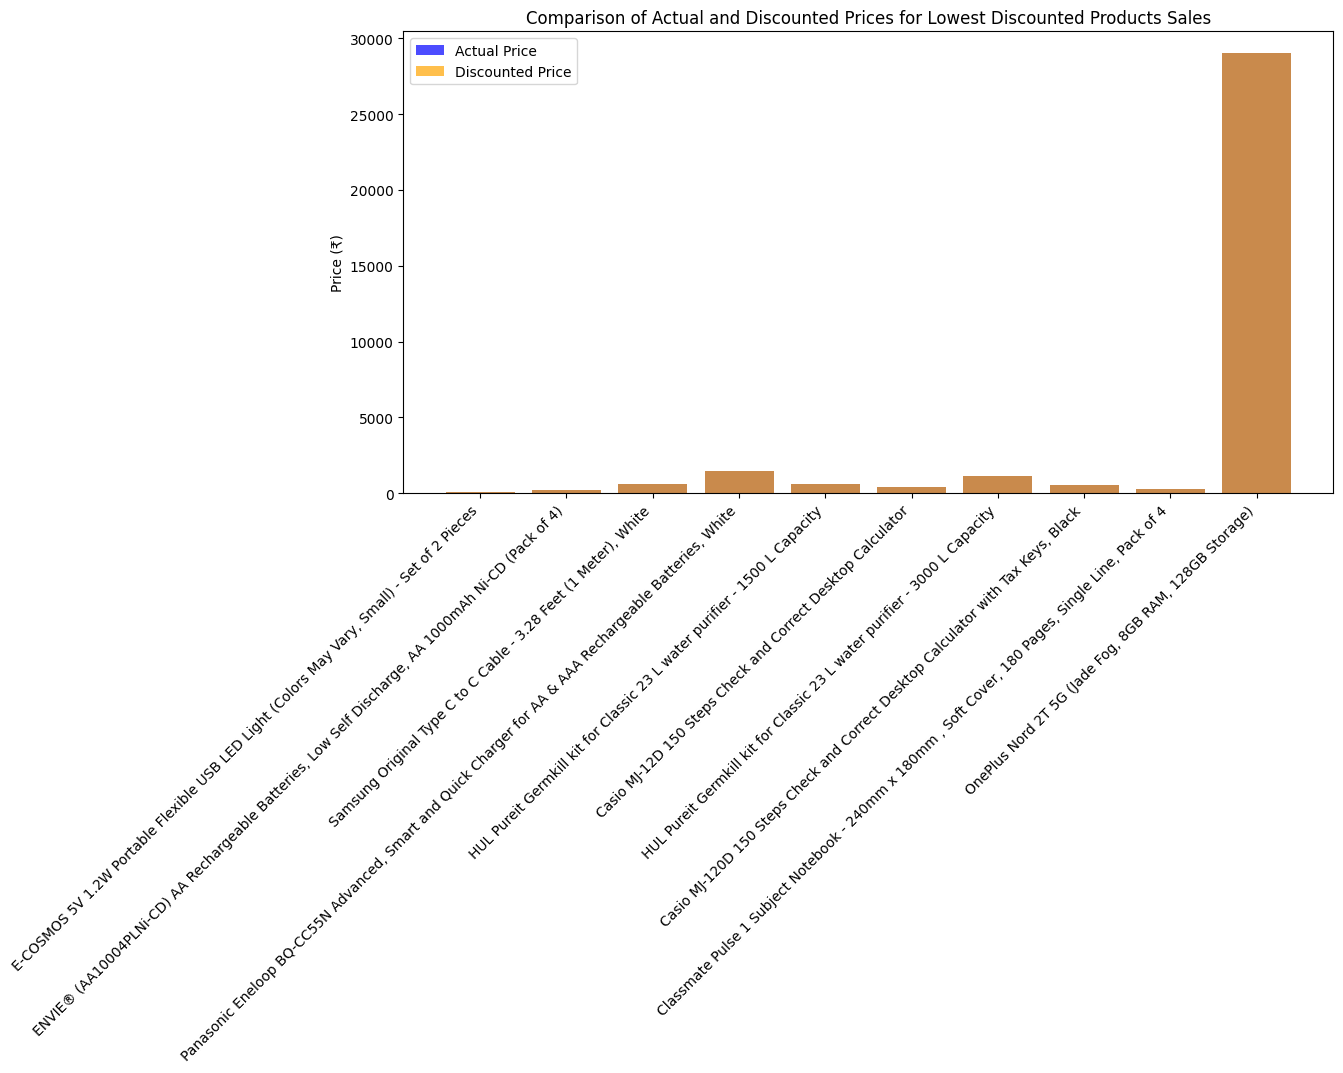

In [26]:
# Filtering the products with the lowest discount rates
lowest_discounted_products = df_new.sort_values(by='discount_percentage', ascending=True).head(10)

# Selecting relevant columns for analysis
lowest_discounted_products = lowest_discounted_products[['product_name', 'discount_percentage', 'discounted_price', 'actual_price']]

# Visualizing the products with the lowest discount rates
plt.figure(figsize=(12, 6))
index = range(len(lowest_discounted_products))
plt.bar(index, lowest_discounted_products['actual_price'], label='Actual Price', alpha=0.7, color='blue')
plt.bar(index, lowest_discounted_products['discounted_price'], label='Discounted Price', alpha=0.7, color='orange')

# Adding product names as x-axis labels
plt.xticks(index, lowest_discounted_products['product_name'], rotation=45, ha='right', fontsize=10)

# Adding labels and title
plt.ylabel('Price (₹)')
plt.title('Comparison of Actual and Discounted Prices for Lowest Discounted Products Sales')
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()


<ipython-input-27-2fdcc2dcf952>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


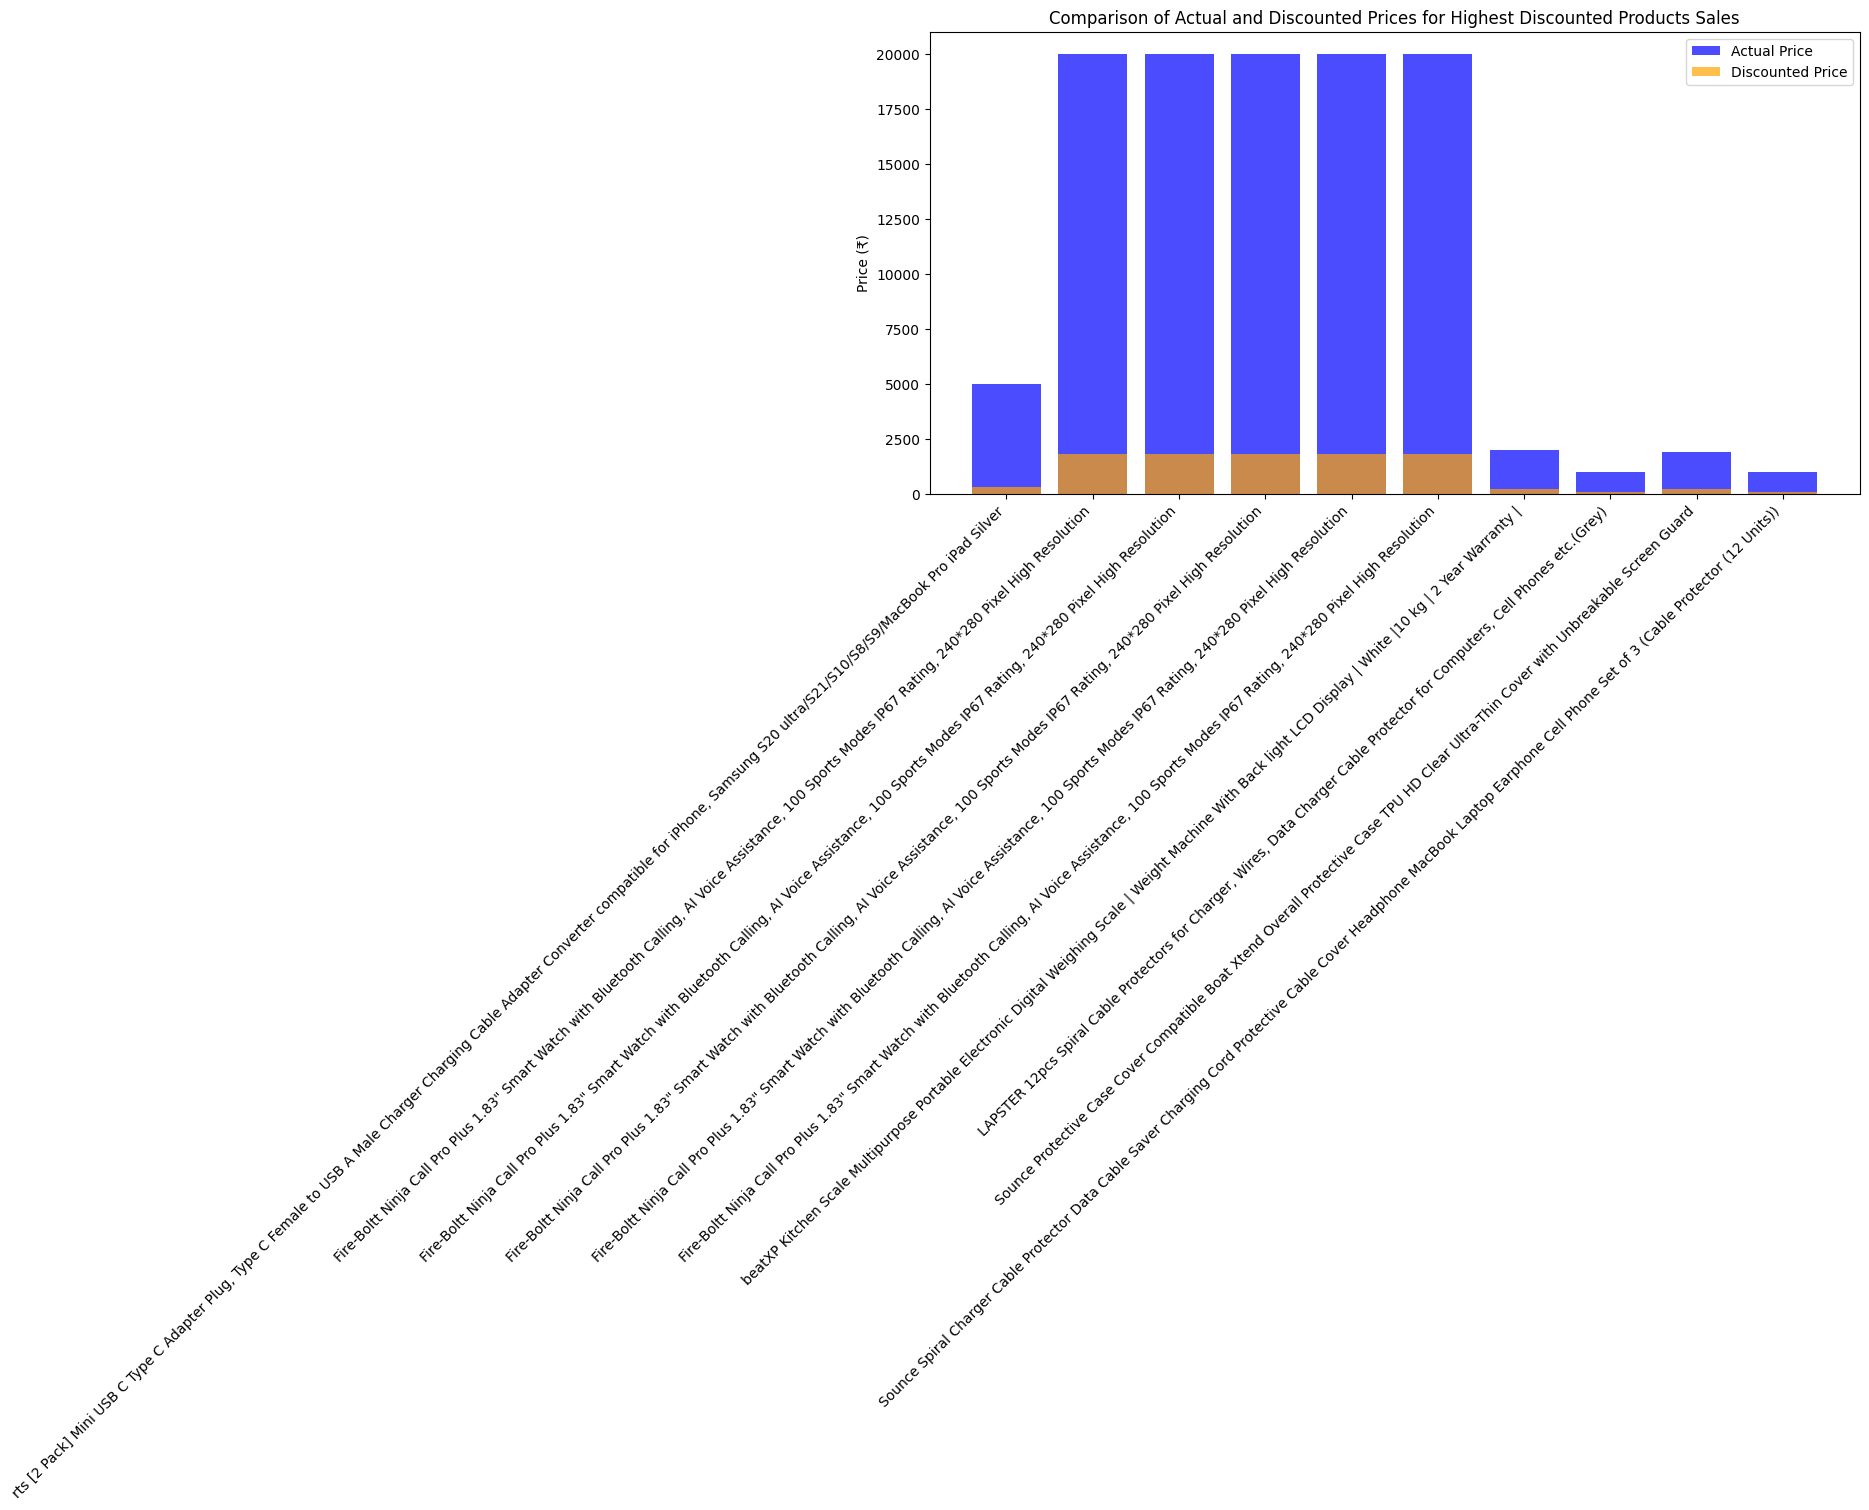

In [27]:
# Filtering the products with the lowest discount rates
highest_discounted_products = df_new.sort_values(by='discount_percentage', ascending=False).head(10)

# Selecting relevant columns for analysis
highest_discounted_products = highest_discounted_products[['product_name', 'discount_percentage', 'discounted_price', 'actual_price']]

# Visualizing the products with the highest discount rates
plt.figure(figsize=(12, 6))
index = range(len(highest_discounted_products))
plt.bar(index, highest_discounted_products['actual_price'], label='Actual Price', alpha=0.7, color='blue')
plt.bar(index, highest_discounted_products['discounted_price'], label='Discounted Price', alpha=0.7, color='orange')

# Adding product names as x-axis labels
plt.xticks(index, highest_discounted_products['product_name'], rotation=45, ha='right', fontsize=10)

# Adding labels and title
plt.ylabel('Price (₹)')
plt.title('Comparison of Actual and Discounted Prices for Highest Discounted Products Sales')
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

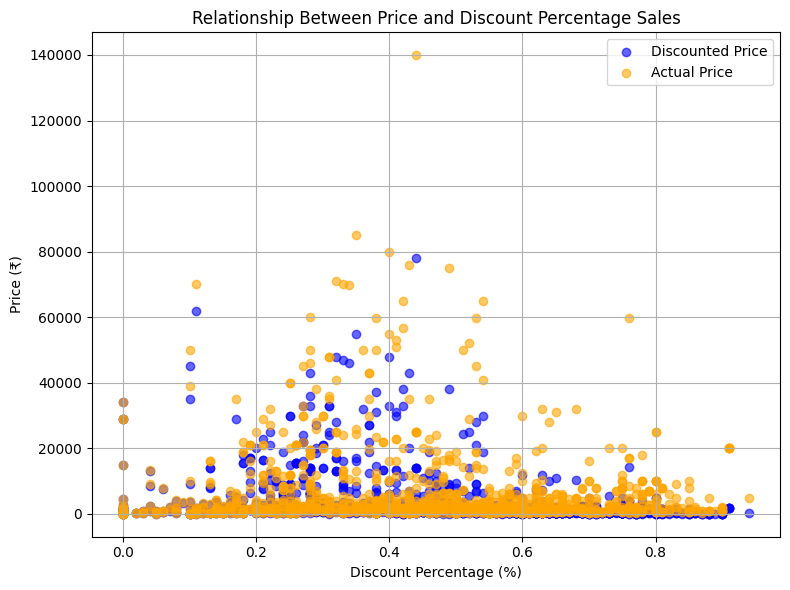

In [28]:
# Visualizing the relationship between price and discount percentage
plt.figure(figsize=(8, 6))

# Scatter plot for discounted price vs discount percentage
plt.scatter(
    df_new['discount_percentage'],
    df_new['discounted_price'],
    alpha=0.6,
    label="Discounted Price",
    color="blue"
)

# Scatter plot for actual price vs discount percentage
plt.scatter(
    df_new['discount_percentage'],
    df_new['actual_price'],
    alpha=0.6,
    label="Actual Price",
    color="orange"
)

# Adding labels and title
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Price (₹)')
plt.title('Relationship Between Price and Discount Percentage Sales')
plt.legend()
plt.grid(True)

# Displaying the chart
plt.tight_layout()
plt.show()


In [29]:
# Extracting categories and calculating average discount percentages
df_new['main_category'] = df_new['category'].apply(lambda x: x.split('|')[0])  # Extracting the main category
average_discounts = df_new.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)

# Displaying the results
average_discounts_df = average_discounts.reset_index()
average_discounts_df.columns = ['Category', 'Average Discount Percentage']


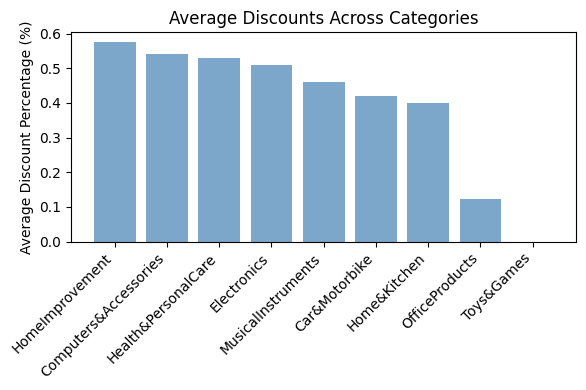

In [30]:
# Extracting categories and calculating average discount percentages
df_new['main_category'] = df_new['category'].apply(lambda x: x.split('|')[0])  # Extracting the main category
average_discounts = df_new.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)


# Visualizing average discounts across categories
plt.figure(figsize=(6, 4))
plt.bar(average_discounts.index, average_discounts.values, color='steelblue', alpha=0.7)

# Adding labels and title
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Average Discount Percentage (%)')
plt.title('Average Discounts Across Categories')

# Displaying the chart
plt.tight_layout()
plt.show()


**The average discount percentage of the main categories shows home improvement and computer accessories to have the highest discount among the categories.**

In [31]:
# Tokenizing the text into individual words
words = []
for review in df_new["review_content"]:
    words.extend(re.findall(r'\w+', str(review).lower()))  # Extract words and convert to lowercase

# Counting the most common words
most_common = Counter(words).most_common(10)
most_common


[('good', 7145),
 ('product', 4112),
 ('quality', 2419),
 ('work', 2102),
 ('use', 1796),
 ('cable', 1540),
 ('price', 1474),
 ('like', 1401),
 ('buy', 1389),
 ('charge', 1302)]

**The review content is being tokenized into individual words to get the most common words count in the revieiw content, then the top 10 most common words is being gotten.**

In [32]:
# Appending the words and frequently occured of the words in the cleaned review text
words = []
freq = []
for word, count in most_common:
    words.append(word)
    freq.append(count)

**Appending the frequently occured words.**

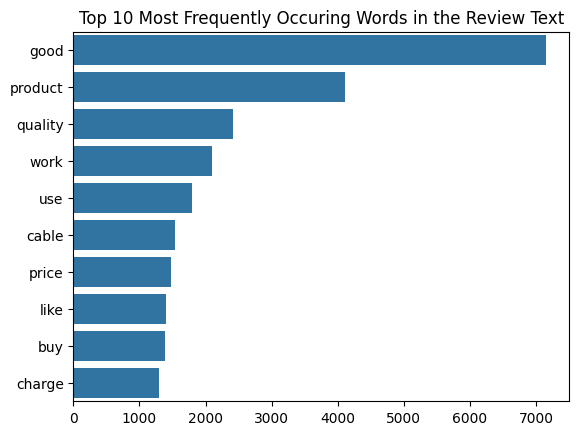

In [33]:
# Plotting a barplot of the 20 most common words in the cleaned review text
sns.barplot(x=freq, y=words)
plt.title("Top 10 Most Frequently Occuring Words in the Review Text")
plt.show()

**The visualization of the top 10 most common words show good and product to be the most common words in the review content, indicating that most customer found product purchased to be a good quality product.**

In [34]:
# Create bigrams from reviews
bigrams = []
for review in df_new["review_content"]:
    words = re.findall(r'\w+', str(review).lower())  # Tokenize words and normalize to lowercase
    bigrams.extend(ngrams(words, 2))  # Create bigrams

# Find the 10 most common bigrams
most_common_bigrams = Counter(bigrams).most_common(10)
most_common_bigrams

[(('good', 'product'), 933),
 (('product', 'good'), 526),
 (('quality', 'good'), 518),
 (('value', 'money'), 470),
 (('good', 'quality'), 432),
 (('easy', 'use'), 375),
 (('nice', 'product'), 312),
 (('build', 'quality'), 288),
 (('work', 'fine'), 286),
 (('sound', 'quality'), 272)]

In [35]:
# Appending the words and frequently occured of the words in the cleaned review text
words_ = []
freq_ = []
for word, count in most_common_bigrams:
    words_.append(word)
    freq_.append(count)

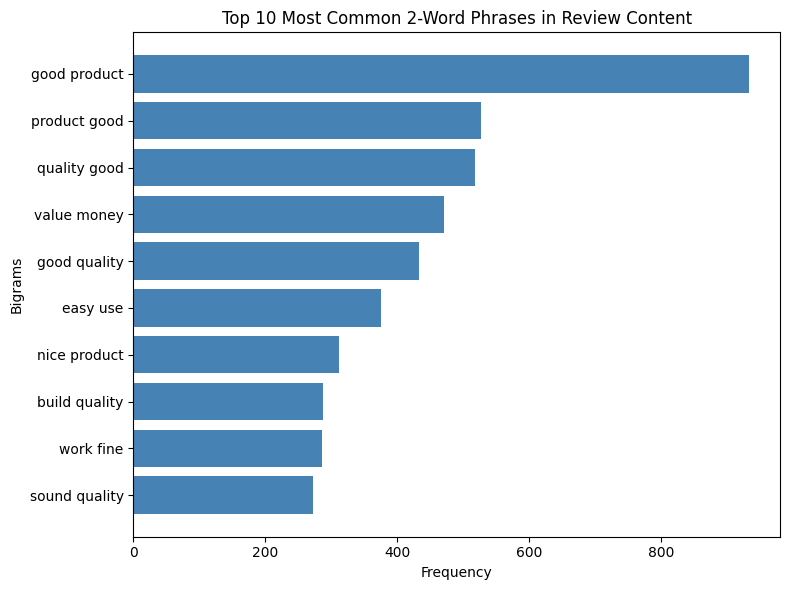

In [36]:
# Prepare data for visualization
bigram_labels, bigram_counts = zip(*[(f"{' '.join(bi)}", count) for bi, count in most_common_bigrams])

# Plot the data
plt.figure(figsize=(8, 6))
plt.barh(bigram_labels, bigram_counts, color='steelblue')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 10 Most Common 2-Word Phrases in Review Content')
plt.gca().invert_yaxis()  # Highest frequency at the top
plt.tight_layout()
plt.show()

**The bigram of the words in the review content show the most 2 common words in the review content show most customers like the product they purchased from amazon.**

In [115]:
# Generate trigrams (3-word combinations)
trigrams = []
for review in df_new["review_content"]:
    words = re.findall(r'\w+', str(review).lower())  # Tokenize words and normalize to lowercase
    trigrams.extend(ngrams(words, 3))  # Create trigrams

# Find the 10 most common trigrams
most_common_trigrams = Counter(trigrams).most_common(10)
most_common_trigrams

[(('amazon', 'com', 'image'), 246),
 (('m', 'media', 'amazon'), 197),
 (('media', 'amazon', 'com'), 197),
 (('https', 'm', 'media'), 189),
 (('com', 'image', 'jpg'), 127),
 (('com', 'image', 'w'), 93),
 (('image', 'w', 'image'), 93),
 (('good', 'product', 'good'), 86),
 (('w', 'image', 'jpg'), 83),
 (('good', 'value', 'money'), 81)]

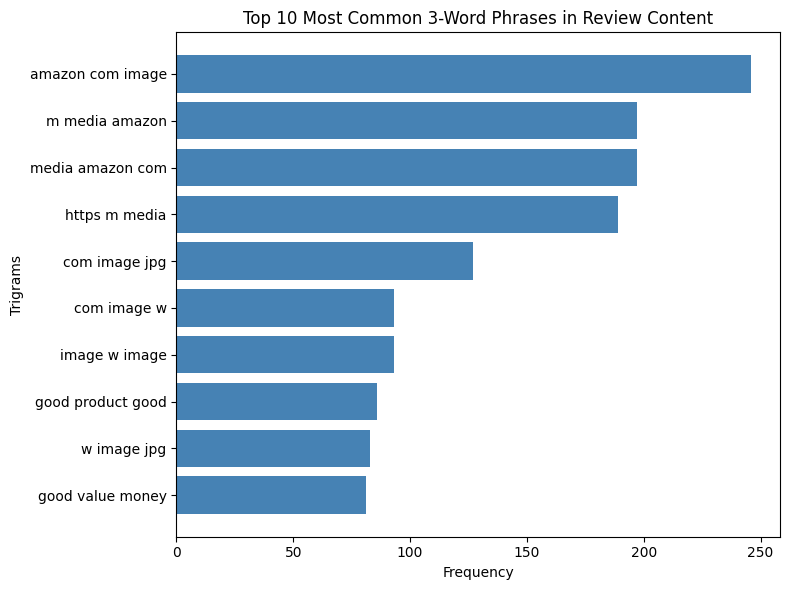

In [38]:
# Prepare data for visualization
trigram_labels, trigram_counts = zip(*[(f"{' '.join(tri)}", count) for tri, count in most_common_trigrams])

# Plot the data
plt.figure(figsize=(8, 6))
plt.barh(trigram_labels, trigram_counts, color='steelblue')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.title('Top 10 Most Common 3-Word Phrases in Review Content')
plt.gca().invert_yaxis()  # Highest frequency at the top
plt.tight_layout()
plt.show()

**The trigram of the dataset review content show the most 3 common words in the dataset to be of positive review from the custumers in the dataset.**

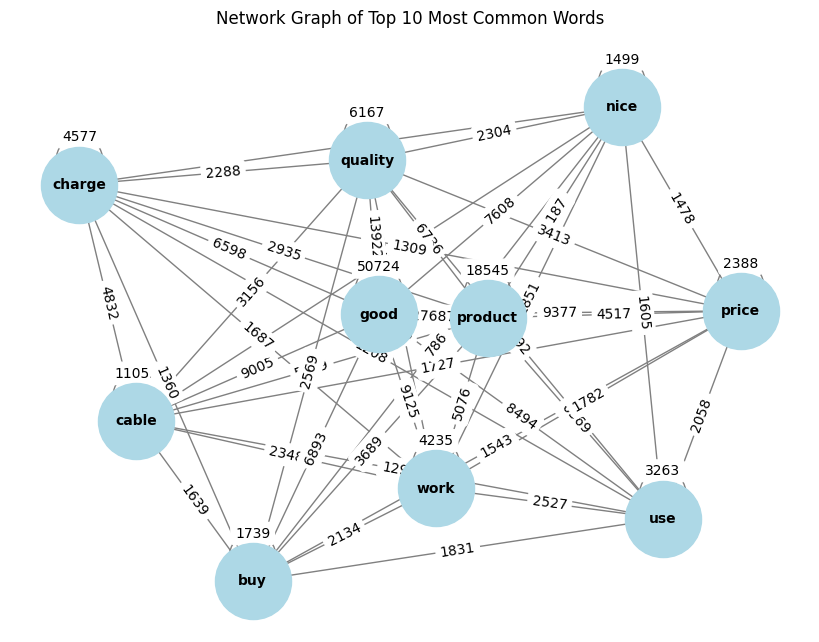

In [39]:
# Combining the textual data
text_columns = ['product_name', 'review_title', 'review_content']
combined_text = df_new[text_columns].fillna('').apply(lambda x: ' '.join(x), axis=1).str.lower()

# Tokenize and clean text
def clean_and_tokenize(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    tokens = text.split()
    return tokens

tokens = combined_text.apply(clean_and_tokenize)

# Flatten the list of tokens and count word frequencies
all_tokens = [token for sublist in tokens for token in sublist]
word_counts = Counter(all_tokens)

# Get the top 10 most common words
top_words = [word for word, count in word_counts.most_common(10)]

# Create co-occurrence pairs for the top words
co_occurrences = []
for token_list in tokens:
    filtered_tokens = [token for token in token_list if token in top_words]
    co_occurrences.extend(combinations(filtered_tokens, 2))

# Count co-occurrences
co_occurrence_counts = Counter(co_occurrences)

# Create a network graph
G = nx.Graph()
for (word1, word2), count in co_occurrence_counts.items():
    G.add_edge(word1, word2, weight=count)

# Plot the network graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Position nodes using spring layout
nx.draw(
    G, pos,
    with_labels=True, node_size=3000, node_color='lightblue',
    font_size=10, font_weight='bold', edge_color='gray'
)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Network Graph of Top 10 Most Common Words")
plt.show()


**The network graph of the top 10 most common words in the product name, review title and review content columns show good product are the 2 most common words that link to other words in the columns.**

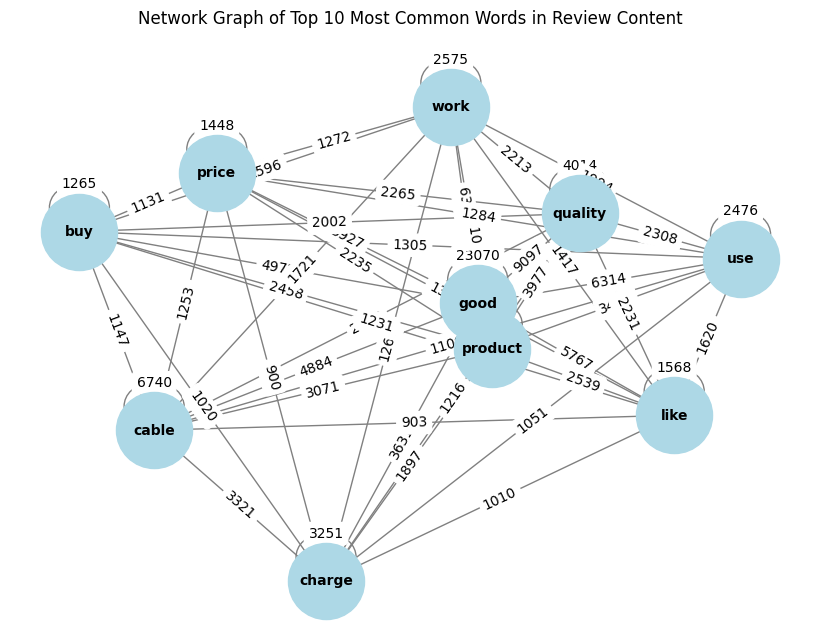

In [40]:
# Extract and analyze the 'review_content' column specifically
review_content = df_new['review_content'].fillna('').str.lower()

# Tokenize and clean text specifically for the 'review_content' column
def clean_and_tokenize(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    tokens = text.split()
    return tokens

tokens_review_content = review_content.apply(clean_and_tokenize)

# Flatten the list of tokens and count word frequencies for 'review_content'
all_tokens_review_content = [token for sublist in tokens_review_content for token in sublist]
word_counts_review_content = Counter(all_tokens_review_content)

# Get the top 10 most common words in 'review_content'
top_words_review_content = [word for word, count in word_counts_review_content.most_common(10)]

# Create co-occurrence pairs for the top words in 'review_content'
co_occurrences_review_content = []
for token_list in tokens_review_content:
    filtered_tokens = [token for token in token_list if token in top_words_review_content]
    co_occurrences_review_content.extend(combinations(filtered_tokens, 2))

# Count co-occurrences for 'review_content'
co_occurrence_counts_review_content = Counter(co_occurrences_review_content)

# Create a network graph for 'review_content'
G_review_content = nx.Graph()
for (word1, word2), count in co_occurrence_counts_review_content.items():
    G_review_content.add_edge(word1, word2, weight=count)

# Plot the network graph for 'review_content'
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_review_content, seed=42)  # Position nodes using spring layout
nx.draw(
    G_review_content, pos,
    with_labels=True, node_size=3000, node_color='lightblue',
    font_size=10, font_weight='bold', edge_color='gray'
)
edge_labels = nx.get_edge_attributes(G_review_content, 'weight')
nx.draw_networkx_edge_labels(G_review_content, pos, edge_labels=edge_labels)
plt.title("Network Graph of Top 10 Most Common Words in Review Content")
plt.show()

**The network graph of the top 10 most common words in the review content column show the 2 most common words in the column is good product which is more linked to other words in the column.**

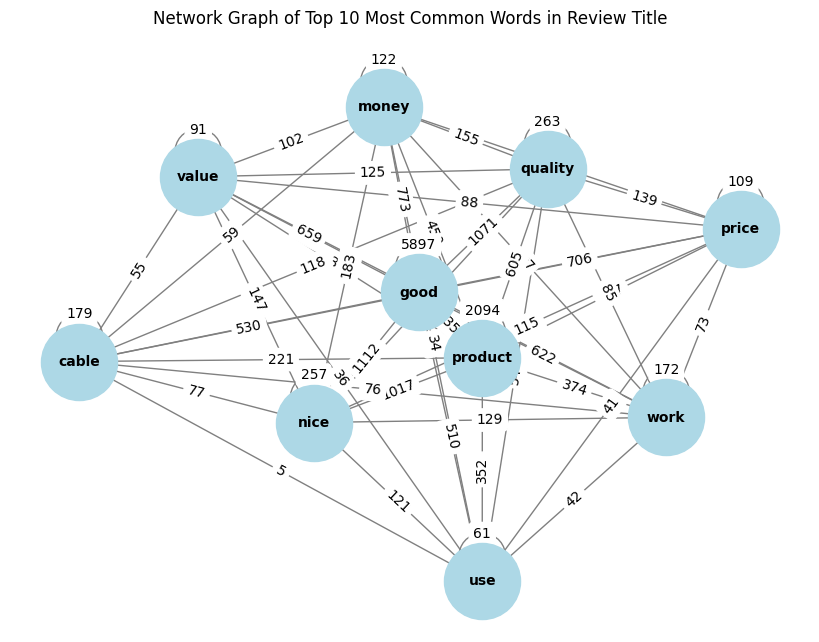

In [41]:
# Extract and analyze the 'review_content' column specifically
review_content = df_new['review_title'].fillna('').str.lower()

# Tokenize and clean text specifically for the 'review_content' column
def clean_and_tokenize(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    tokens = text.split()
    return tokens

tokens_review_content = review_content.apply(clean_and_tokenize)

# Flatten the list of tokens and count word frequencies for 'review_content'
all_tokens_review_content = [token for sublist in tokens_review_content for token in sublist]
word_counts_review_content = Counter(all_tokens_review_content)

# Get the top 10 most common words in 'review_content'
top_words_review_content = [word for word, count in word_counts_review_content.most_common(10)]

# Create co-occurrence pairs for the top words in 'review_content'
co_occurrences_review_content = []
for token_list in tokens_review_content:
    filtered_tokens = [token for token in token_list if token in top_words_review_content]
    co_occurrences_review_content.extend(combinations(filtered_tokens, 2))

# Count co-occurrences for 'review_content'
co_occurrence_counts_review_content = Counter(co_occurrences_review_content)

# Create a network graph for 'review_content'
G_review_content = nx.Graph()
for (word1, word2), count in co_occurrence_counts_review_content.items():
    G_review_content.add_edge(word1, word2, weight=count)

# Plot the network graph for 'review_content'
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_review_content, seed=42)  # Position nodes using spring layout
nx.draw(
    G_review_content, pos,
    with_labels=True, node_size=3000, node_color='lightblue',
    font_size=10, font_weight='bold', edge_color='gray'
)
edge_labels = nx.get_edge_attributes(G_review_content, 'weight')
nx.draw_networkx_edge_labels(G_review_content, pos, edge_labels=edge_labels)
plt.title("Network Graph of Top 10 Most Common Words in Review Title")
plt.show()

**The network graph of the top 10 most common words in the review title show good product is the 2 most common words in the review title which link to other words.**

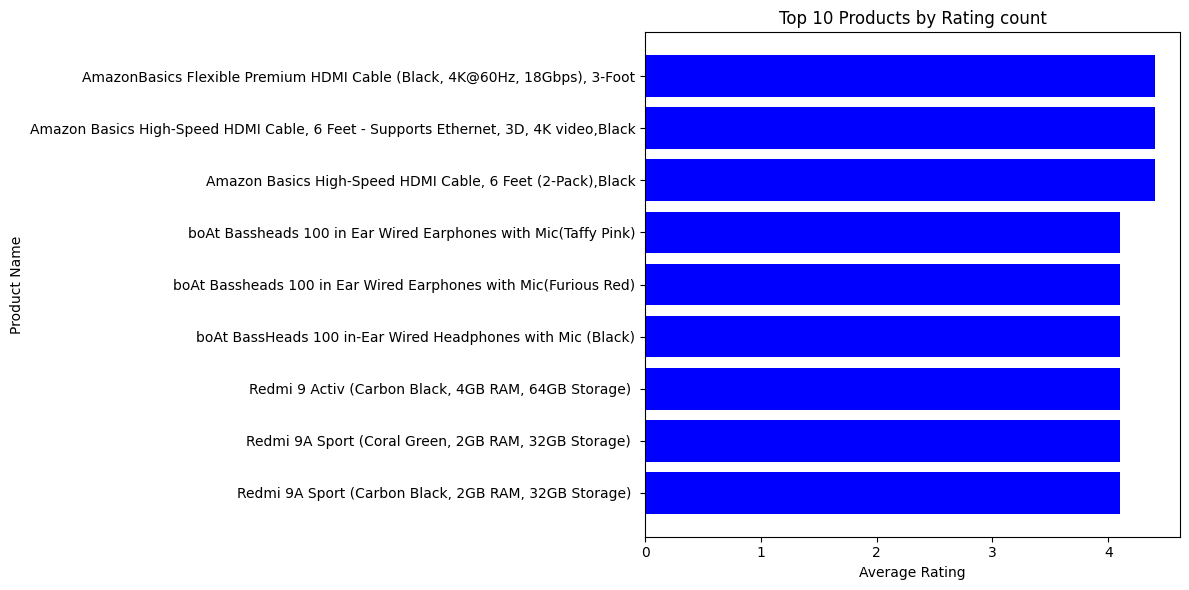

In [42]:
df_new['main_product_name'] = df_new['product_name'].apply(lambda x: x.split('|')[0])  # Extracting the main category


# Select the top 10 products by rating count
top_10_products = df_new.nlargest(10, 'rating_count')

# Plot the ratings for the top 10 products
plt.figure(figsize=(12, 6))
plt.barh(top_10_products['main_product_name'], top_10_products['rating'], color='blue')
plt.title('Top 10 Products by Rating count')
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # To display the highest rated product at the top
plt.tight_layout()
plt.show()


**The top 10 products with the highest rating counts, show the top 10 products with the highest number of rating counts.**

<ipython-input-43-8b41d91aa9fc>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


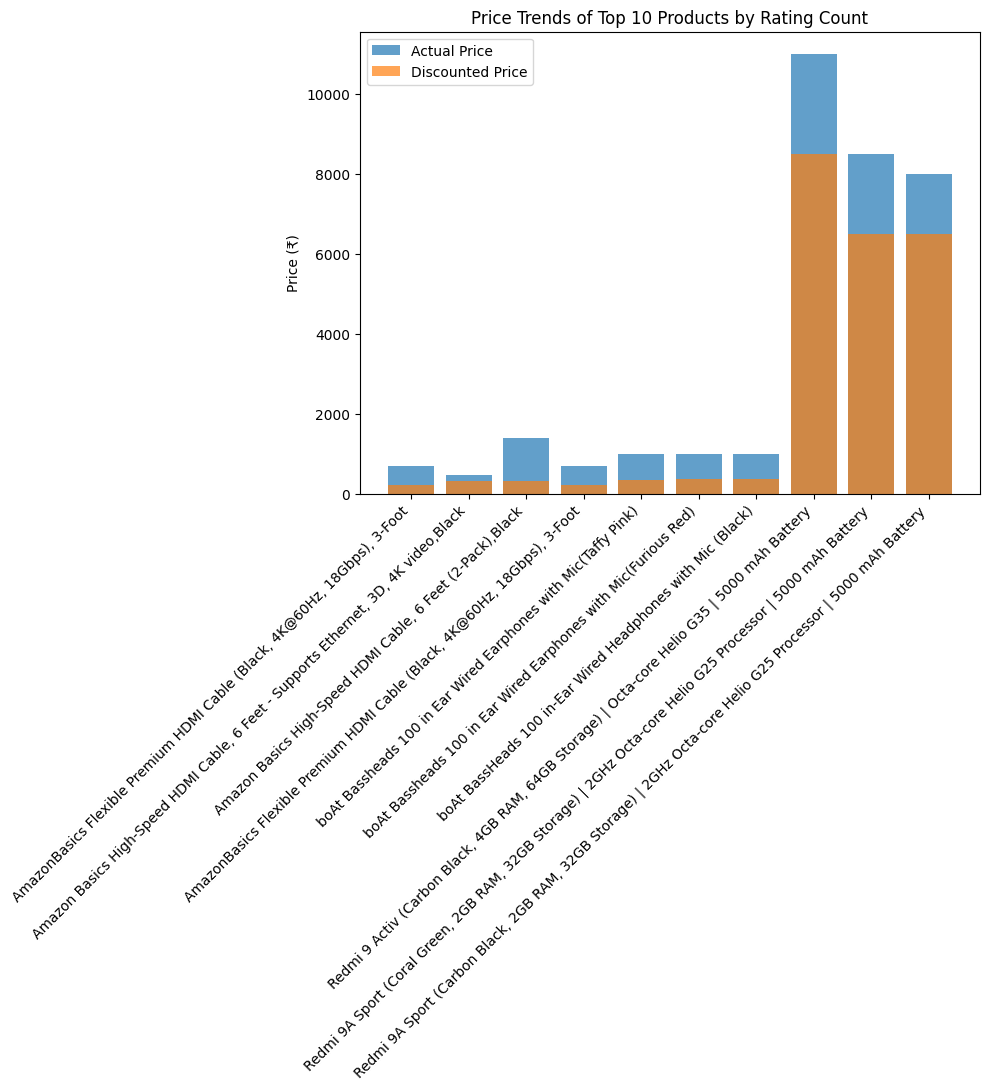

In [43]:
# Creating a bar chart to compare discounted price and actual price of the top 10 product by rating count
plt.figure(figsize=(8, 6))
index = range(len(top_10_products))
plt.bar(index, top_10_products['actual_price'], label='Actual Price', alpha=0.7)
plt.bar(index, top_10_products['discounted_price'], label='Discounted Price', alpha=0.7)

# Adding product names as x-axis labels
plt.xticks(index, top_10_products['product_name'], rotation=45, ha='right', fontsize=10)

# Adding labels and title
plt.ylabel('Price (₹)')
plt.title('Price Trends of Top 10 Products by Rating Count')
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

In [44]:
df_new['main_category'].value_counts()

main_category
Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

<ipython-input-45-f389a71067f5>:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


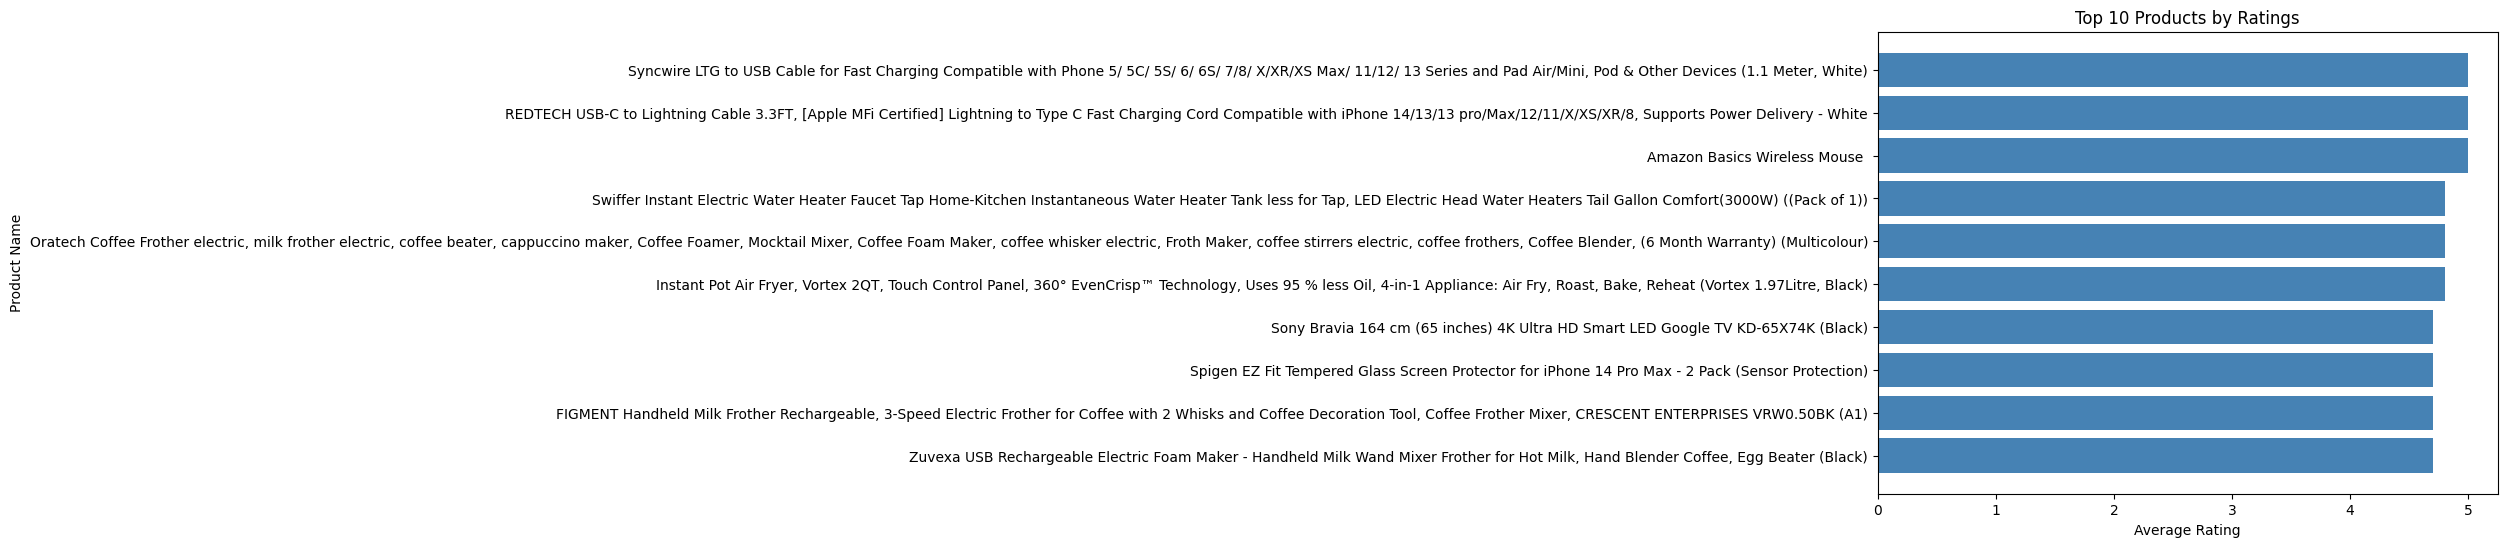

In [45]:
# Select the top 10 products by rating count
top_10_products_rating = df_new.nlargest(10, 'rating')

# Plot the ratings for the top 10 products
plt.figure(figsize=(8, 6))
plt.barh(top_10_products_rating['main_product_name'], top_10_products_rating['rating'], color='steelblue')
plt.title('Top 10 Products by Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # To display the highest rated product at the top
plt.tight_layout()
plt.show()

**The top 10 products with the highest rating show the top 10 products with the highest rating.**

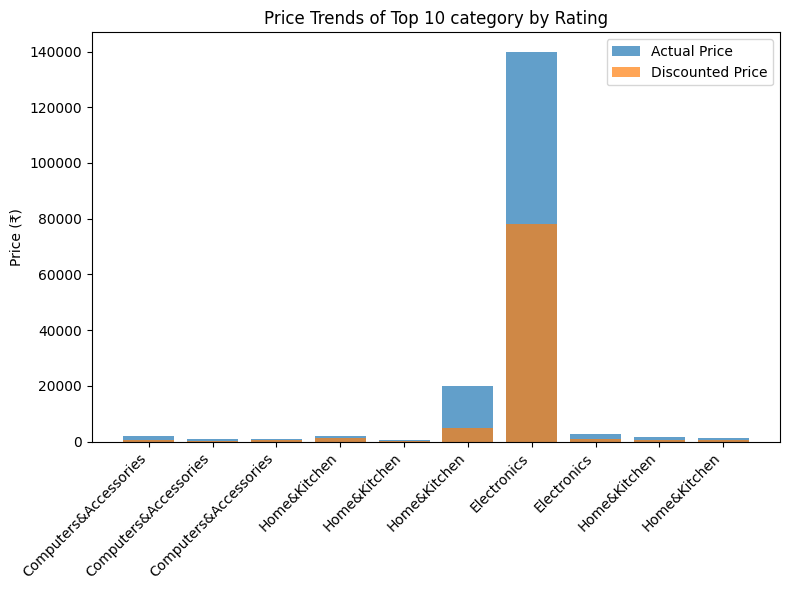

In [46]:
# Creating a bar chart to compare discounted price and actual price of the top 10 product by rating
plt.figure(figsize=(8, 6))
index = range(len(top_10_products_rating))
plt.bar(index, top_10_products_rating['actual_price'], label='Actual Price', alpha=0.7)
plt.bar(index, top_10_products_rating['discounted_price'], label='Discounted Price', alpha=0.7)

# Adding product names as x-axis labels
plt.xticks(index, top_10_products_rating['main_category'], rotation=45, ha='right', fontsize=10)

# Adding labels and title
plt.ylabel('Price (₹)')
plt.title('Price Trends of Top 10 category by Rating')
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

<ipython-input-47-e177ce58e1d3>:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


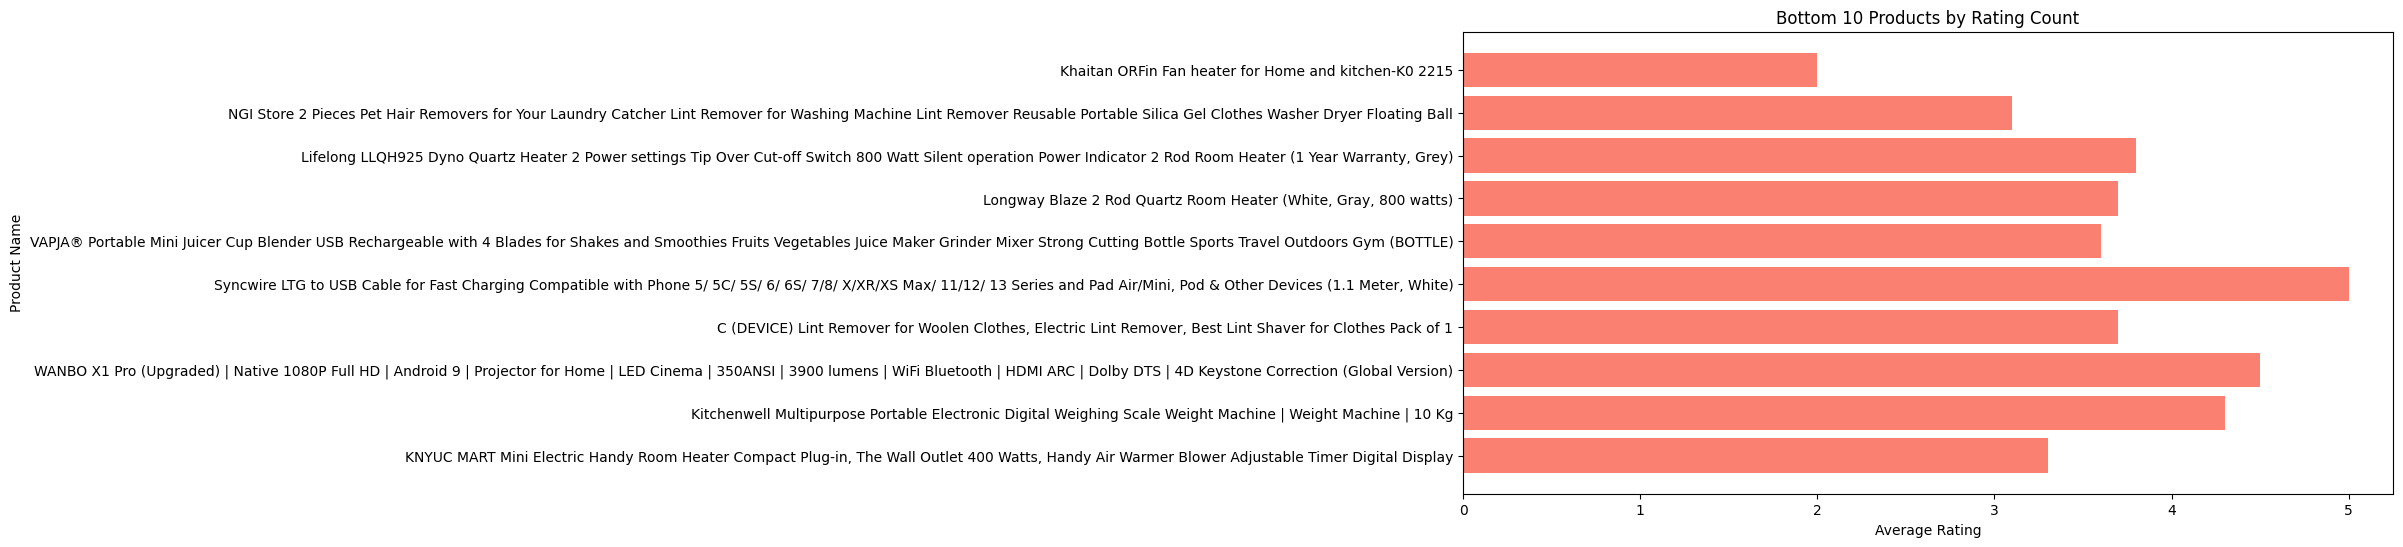

In [47]:
# Select the bottom 10 products by rating count
bottom_10_products = df_new.nsmallest(10, 'rating_count')

# Plot the ratings for the bottom 10 products
plt.figure(figsize=(12, 6))
plt.barh(bottom_10_products['product_name'], bottom_10_products['rating'], color='salmon')
plt.title('Bottom 10 Products by Rating Count')
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # To display the least rated product at the top
plt.tight_layout()
plt.show()


**The lowest 10 products with the lowest rating counts, show the lowest 10 products with the lowest number of rating counts.**

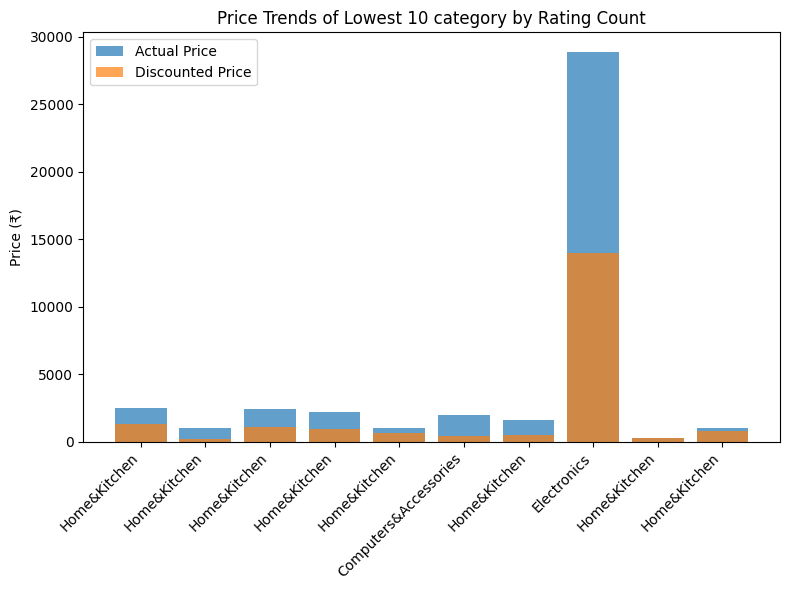

In [48]:
# Creating a bar chart to compare discounted price and actual price of the lowest 10 product by rating count
plt.figure(figsize=(8, 6))
index = range(len(bottom_10_products))
plt.bar(index, bottom_10_products['actual_price'], label='Actual Price', alpha=0.7)
plt.bar(index, bottom_10_products['discounted_price'], label='Discounted Price', alpha=0.7)

# Adding product names as x-axis labels
plt.xticks(index, bottom_10_products['main_category'], rotation=45, ha='right', fontsize=10)

# Adding labels and title
plt.ylabel('Price (₹)')
plt.title('Price Trends of Lowest 10 category by Rating Count')
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

<ipython-input-49-1cf96be4c79f>:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


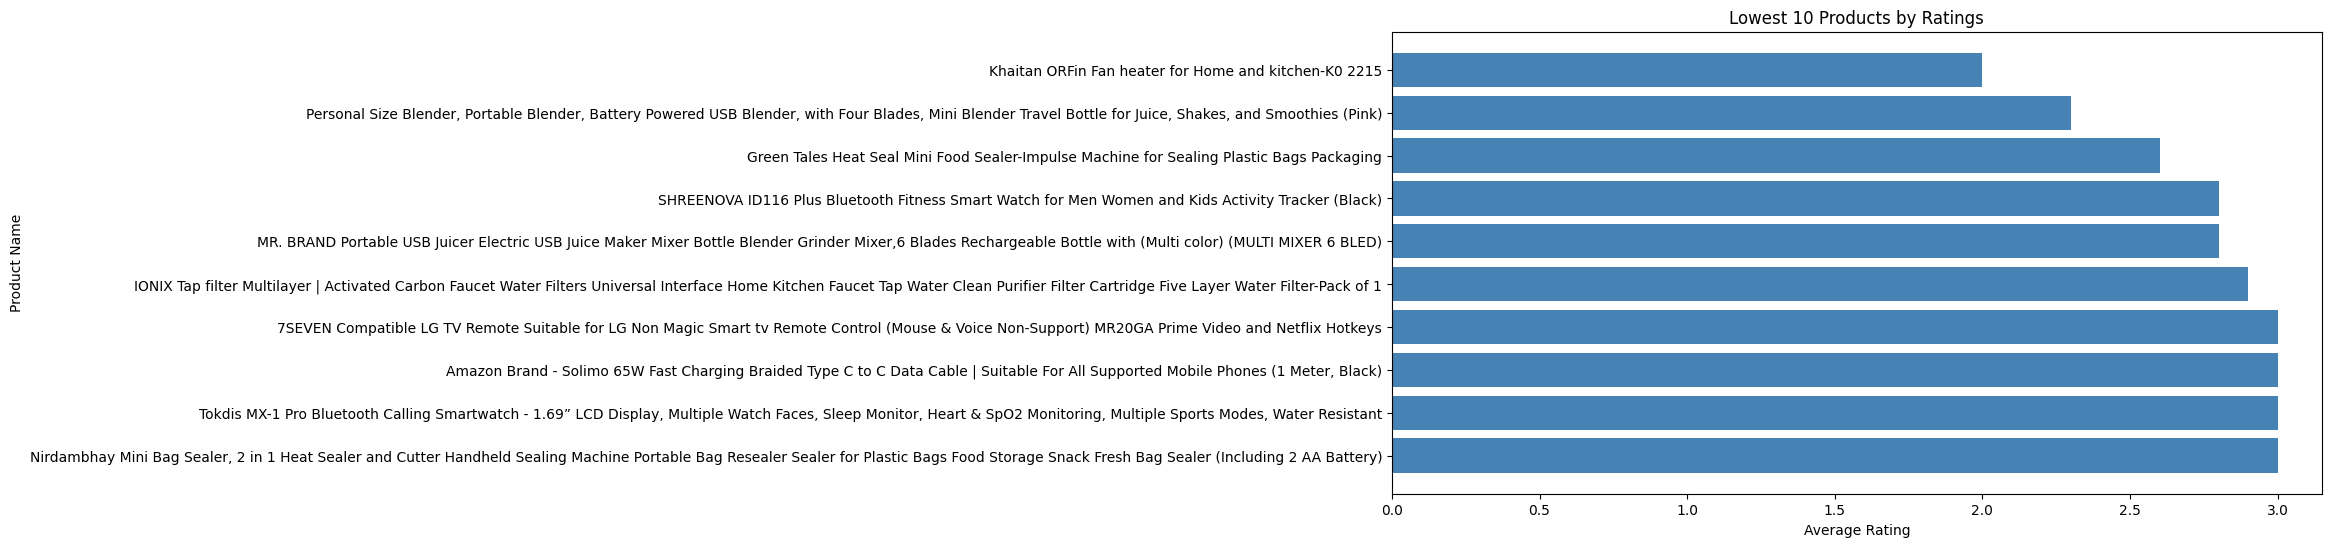

In [49]:
# Select the lowest 10 products by rating
lowest_10_products_rating = df_new.nsmallest(10, 'rating')

# Plot the ratings for the lowest 10 products
plt.figure(figsize=(12, 6))
plt.barh(lowest_10_products_rating['product_name'], lowest_10_products_rating['rating'], color='steelblue')
plt.title('Lowest 10 Products by Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # To display the least rated product at the top
plt.tight_layout()
plt.show()


<ipython-input-50-4f4c18500527>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


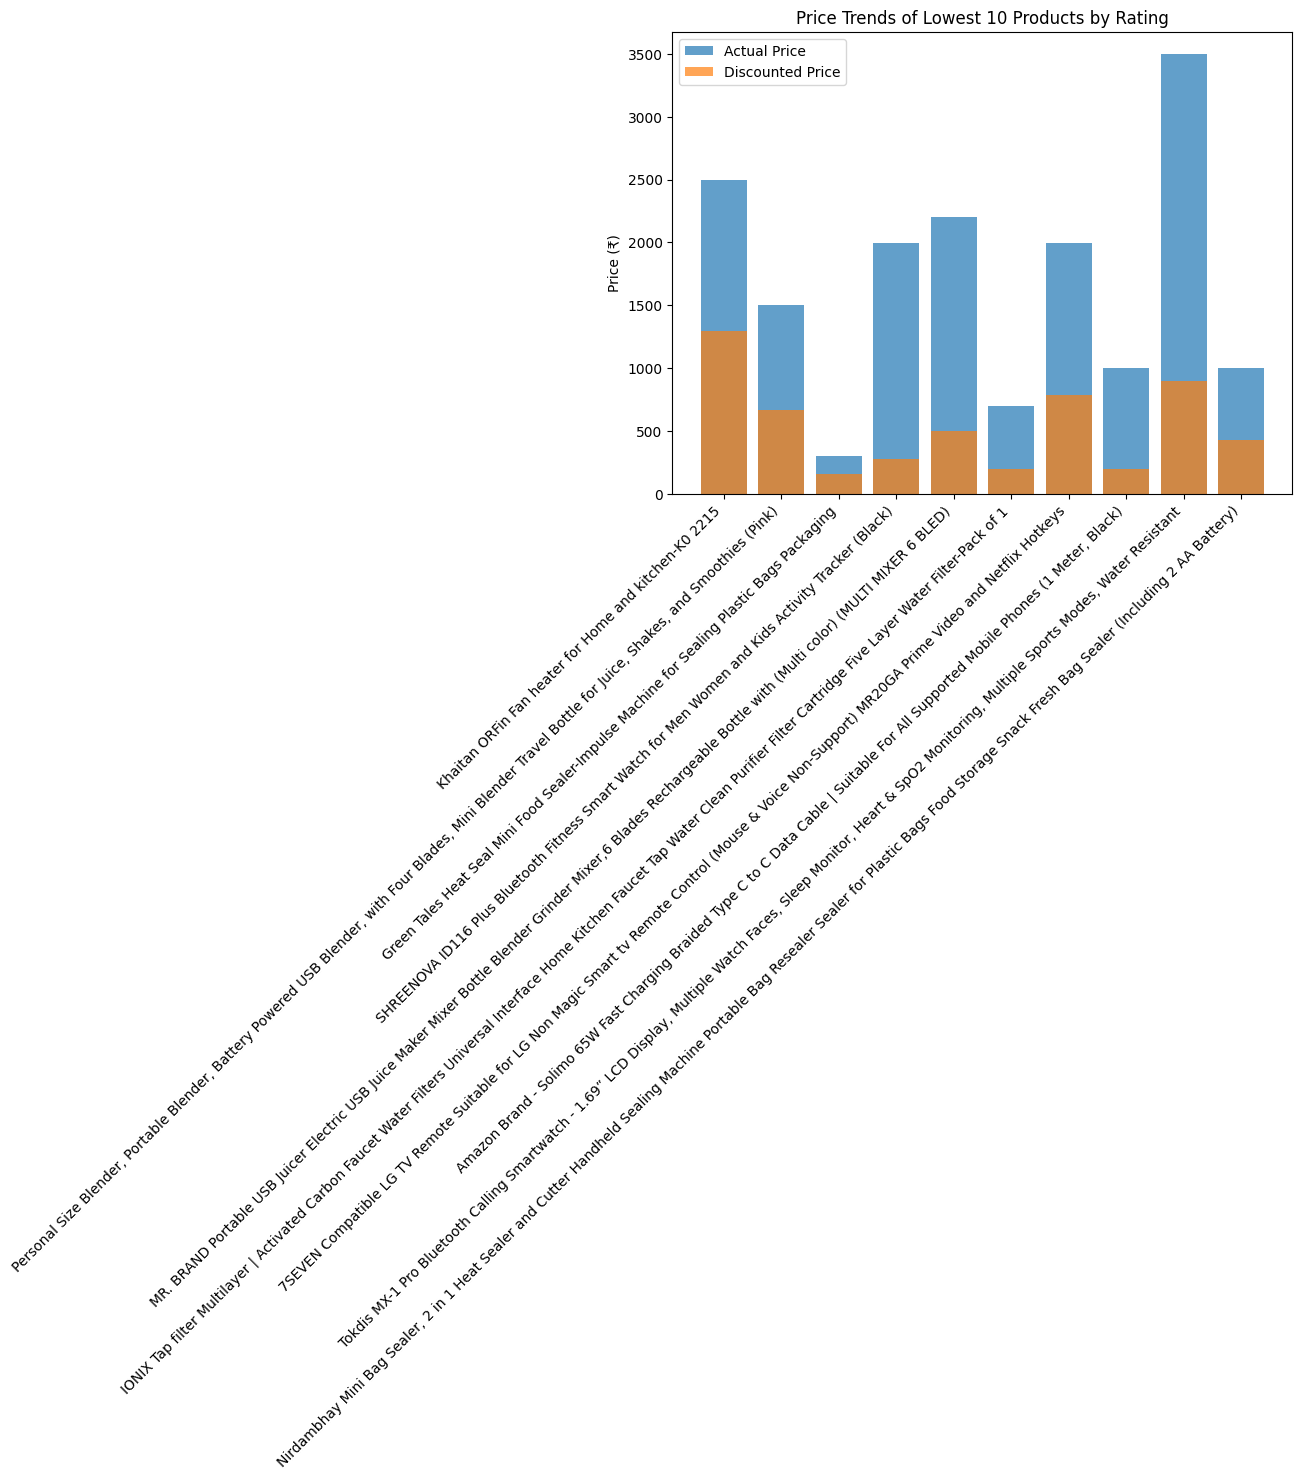

In [50]:
# Creating a bar chart to compare discounted price and actual price of the lowest 10 product by rating
plt.figure(figsize=(8, 6))
index = range(len(lowest_10_products_rating))
plt.bar(index, lowest_10_products_rating['actual_price'], label='Actual Price', alpha=0.7)
plt.bar(index, lowest_10_products_rating['discounted_price'], label='Discounted Price', alpha=0.7)

# Adding product names as x-axis labels
plt.xticks(index, lowest_10_products_rating['product_name'], rotation=45, ha='right', fontsize=10)

# Adding labels and title
plt.ylabel('Price (₹)')
plt.title('Price Trends of Lowest 10 Products by Rating')
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

**The lowest 10 products with the lowest rating, show the lowest 10 products with the lowest rating.**

In [51]:
# Select the highest-rated products (with the highest average ratings and significant rating count)
highest_rated_products = df_new[(df_new['rating'] >= 4.5) & (df_new['rating_count'] > 50)]

# Sort by rating and rating count for better visualization
highest_rated_products = highest_rated_products.sort_values(by=['rating', 'rating_count'], ascending=[False, False])

# Viewing the first 5 rows
highest_rated_products.head()

product_name  \
324   REDTECH USB-C to Lightning Cable 3.3FT, [Apple...   
1145  Swiffer Instant Electric Water Heater Faucet T...   
1299  Instant Pot Air Fryer, Vortex 2QT, Touch Contr...   
459   Spigen EZ Fit Tempered Glass Screen Protector ...   
249   Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...   

                                               category  discounted_price  \
324   Computers&Accessories|Accessories&Peripherals|...             249.0   
1145  Home&Kitchen|Heating,Cooling&AirQuality|WaterH...            1439.0   
1299  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...            4995.0   
459   Electronics|Mobiles&Accessories|MobileAccessor...             999.0   
249   Electronics|HomeTheater,TV&Video|Televisions|S...           77990.0   

      actual_price  discount_percentage  rating  rating_count  \
324          999.0                 0.75     5.0        5179.0   
1145        1999.0                 0.28     4.8       53803.0   
1299       20049.0                 0.75     4.8        3964.0   
459         2899.0                 0.66     4.7        7779.0   
249       139900.0                 0.44     4.7        5935.0   

                                          about_product  \
324   💎[The Fastest Charge] - This iPhone USB C cabl...   
1145  ✔Quick Electric Hot Water Tap Heating tube: hi...   
1299  VOLTAGE (230 Volts): Instant Vortex Air Fryer ...   
459   Compatibility ; Glass Screen Protector Compati...   
249   Resolution: 4K Ultra HD (3840 x 2160) | Refres...   

                                           review_title  \
324                                     awesome product   
1145  good product expansive work upto area great pr...   
1299  love good product good product easy use fine p...   
459   easy install good screen guard easy install ea...   
249   product installation excellent delivery staff ...   

                                         review_content  \
324   quick delivery awesome productpacking goodjust...   
1145  buy well fabulous product recommend 👍 👍 small ...   
1299  multiple air fryer good value money good produ...   
459   easy install home kit require install protecto...   
249   delivery people careful unpack amazon need tra...   

              main_category                                  main_product_name  
324   Computers&Accessories  REDTECH USB-C to Lightning Cable 3.3FT, [Apple...  
1145           Home&Kitchen  Swiffer Instant Electric Water Heater Faucet T...  
1299           Home&Kitchen  Instant Pot Air Fryer, Vortex 2QT, Touch Contr...  
459             Electronics  Spigen EZ Fit Tempered Glass Screen Protector ...  
249             Electronics  Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...

<ipython-input-52-2928724d8bc7>:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


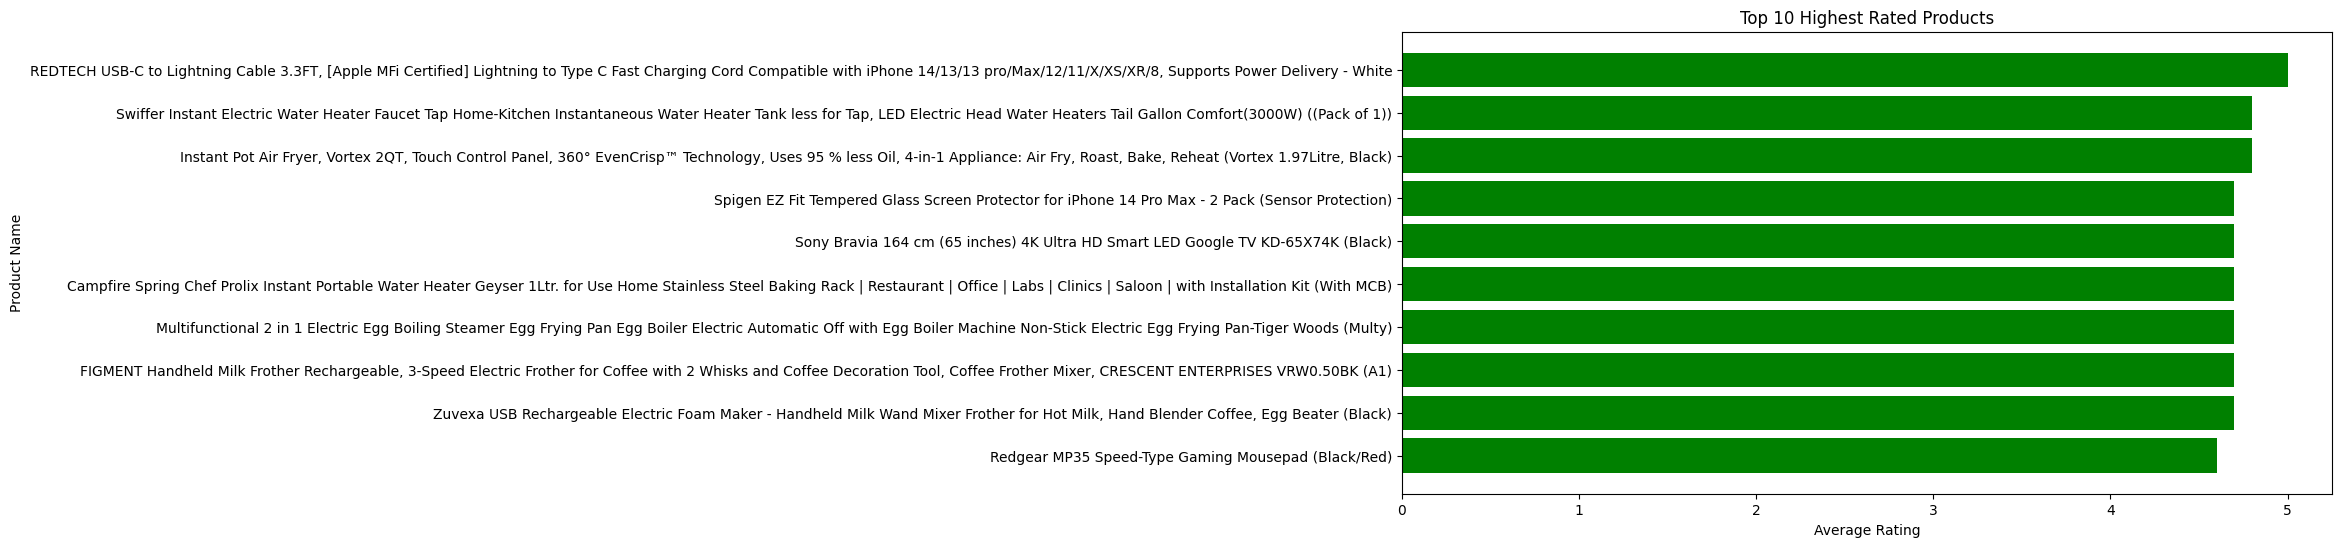

In [52]:
# Visualize the highest-rated products from the dataset with significant rating counts
highest_rated_products_top = highest_rated_products.head(10)  # Limit to top 10 for clear visualization

plt.figure(figsize=(12, 6))
plt.barh(highest_rated_products_top['product_name'], highest_rated_products_top['rating'], color='green')
plt.title('Top 10 Highest Rated Products')
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # To display the highest-rated product at the top
plt.tight_layout()
plt.show()


<ipython-input-53-f05da497bd4a>:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


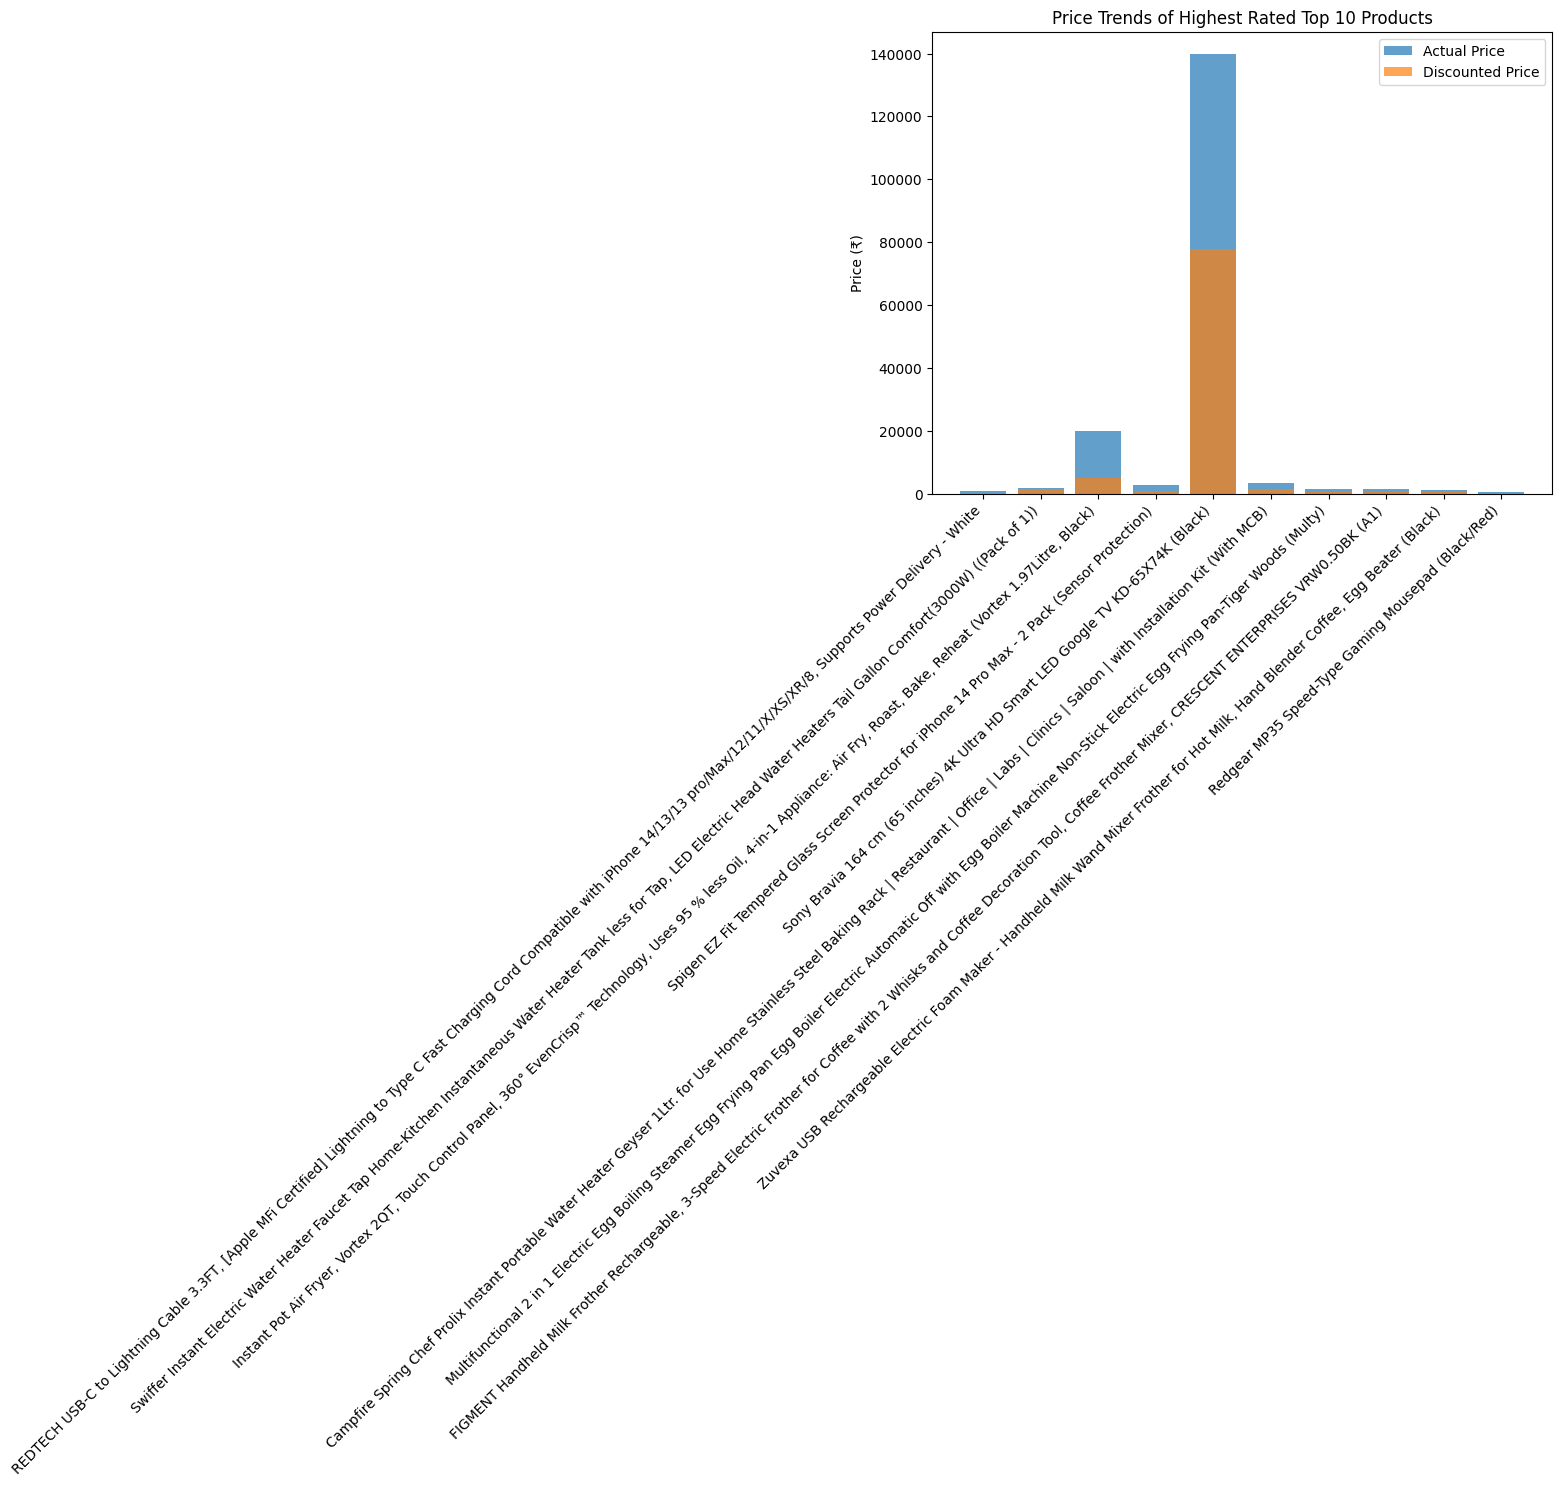

In [53]:
# Creating a bar chart to compare discounted price and actual price of the highest rated top 10 product
plt.figure(figsize=(8, 6))
index = range(len(highest_rated_products_top))
plt.bar(index, highest_rated_products_top['actual_price'], label='Actual Price', alpha=0.7)
plt.bar(index, highest_rated_products_top['discounted_price'], label='Discounted Price', alpha=0.7)

# Adding product names as x-axis labels
plt.xticks(index, highest_rated_products_top['product_name'], rotation=45, ha='right', fontsize=10)

# Adding labels and title
plt.ylabel('Price (₹)')
plt.title('Price Trends of Highest Rated Top 10 Products')
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

In [54]:
# Select the lowest-rated products (with the lowest average ratings and rating count)
lowest_rated_products = df_new[(df_new['rating'] <= 3) & (df_new['rating_count'] > 1)]

# Sort by rating and rating count for better visualization
lowest_rated_products = lowest_rated_products.sort_values(by=['rating'], ascending=[True])

# Viewing the first 5 rows
lowest_rated_products.head()

product_name  \
1309  Khaitan ORFin Fan heater for Home and kitchen-...   
1243  Personal Size Blender, Portable Blender, Batte...   
1356  Green Tales Heat Seal Mini Food Sealer-Impulse...   
545   SHREENOVA ID116 Plus Bluetooth Fitness Smart W...   
1286  MR. BRAND Portable USB Juicer Electric USB Jui...   

                                               category  discounted_price  \
1309  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...            1299.0   
1243  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...             669.0   
1356  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...             161.0   
545         Electronics|WearableTechnology|SmartWatches             281.0   
1286  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...             499.0   

      actual_price  discount_percentage  rating  rating_count  \
1309        2495.0                 0.48     2.0           2.0   
1243        1499.0                 0.55     2.3          13.0   
1356         300.0                 0.46     2.6          24.0   
545         1999.0                 0.86     2.8          87.0   
1286        2199.0                 0.77     2.8         109.0   

                                          about_product  \
1309  Khaitan Orfin Fan heater for Home and kitchen|...   
1243  ✔【Easy to carry around】- This handheld blender...   
1356  Sealing Machine use for snack food saver stora...   
545   ✅ All-day activity tracking: Track steps, dist...   
1286  Portable & Convenient to Charge: This little b...   

                                           review_title  \
1309                        bad quality amazing product   
1243  nice product recommend buy buy defective produ...   
1356  break bit well work replacement send box piece...   
545   good prodat battery life day good switch butto...   
1286  portable powerful good power poor like toy yea...   

                                         review_content main_category  \
1309  heating capacity zero initiate return request ...  Home&Kitchen   
1243  like convenient carry waste money defective pr...  Home&Kitchen   
1356  break useful change product product plastic qu...  Home&Kitchen   
545   good prodat battery life bad nice product disl...   Electronics   
1286  sufficient power product like toy kid use prop...  Home&Kitchen   

                                      main_product_name  
1309  Khaitan ORFin Fan heater for Home and kitchen-...  
1243  Personal Size Blender, Portable Blender, Batte...  
1356  Green Tales Heat Seal Mini Food Sealer-Impulse...  
545   SHREENOVA ID116 Plus Bluetooth Fitness Smart W...  
1286  MR. BRAND Portable USB Juicer Electric USB Jui...

<ipython-input-55-a2b6b0f6bd8e>:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


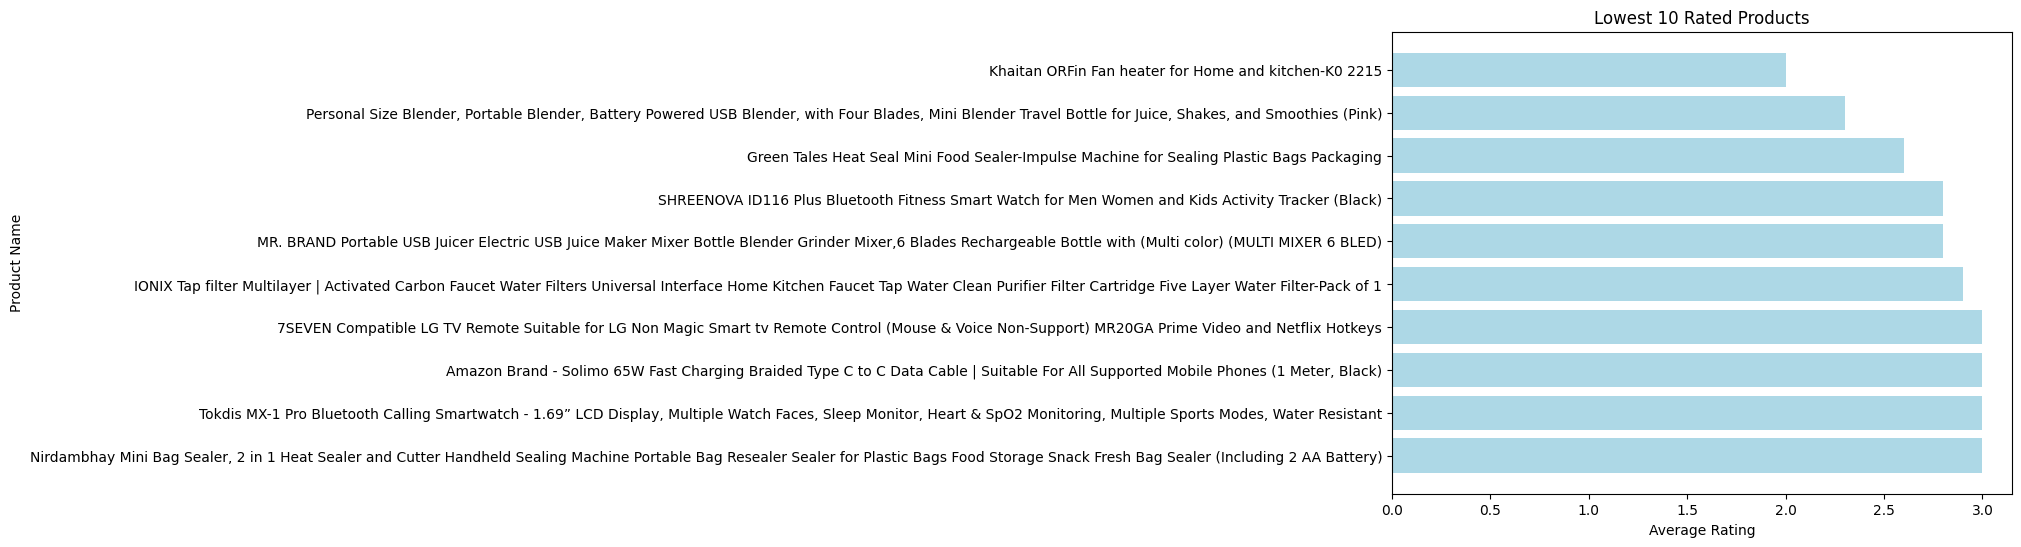

In [55]:
# Visualize the lowest-rated products from the dataset with rating counts
plt.figure(figsize=(8, 6))
plt.barh(lowest_rated_products['product_name'], lowest_rated_products['rating'], color='lightblue')
plt.title('Lowest 10 Rated Products')
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # To display the lowest-rated product
plt.tight_layout()
plt.show()


<ipython-input-56-974754e74bdc>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


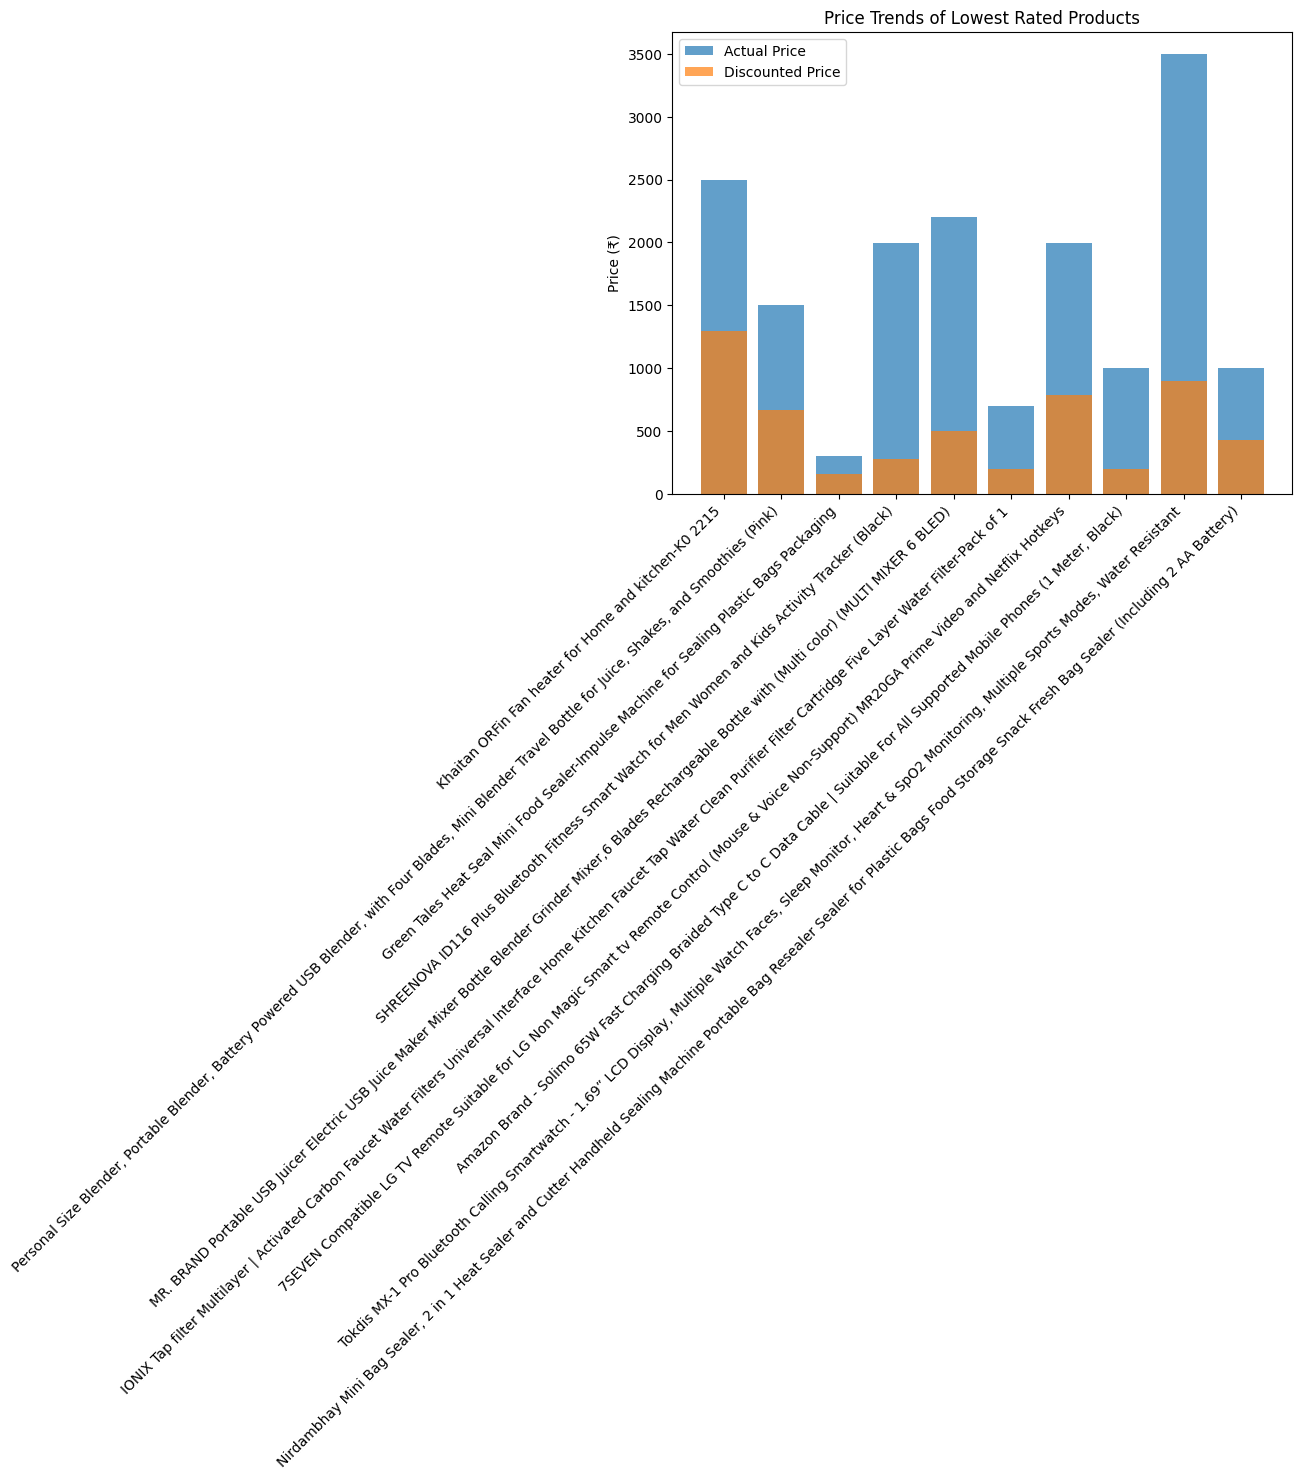

In [56]:
# Creating a bar chart to compare discounted price and actual price of the lowest rated product
plt.figure(figsize=(8, 6))
index = range(len(lowest_rated_products))
plt.bar(index, lowest_rated_products['actual_price'], label='Actual Price', alpha=0.7)
plt.bar(index, lowest_rated_products['discounted_price'], label='Discounted Price', alpha=0.7)

# Adding product names as x-axis labels
plt.xticks(index, lowest_rated_products['product_name'], rotation=45, ha='right', fontsize=10)

# Adding labels and title
plt.ylabel('Price (₹)')
plt.title('Price Trends of Lowest Rated Products')
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

<ipython-input-57-b6d428130948>:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


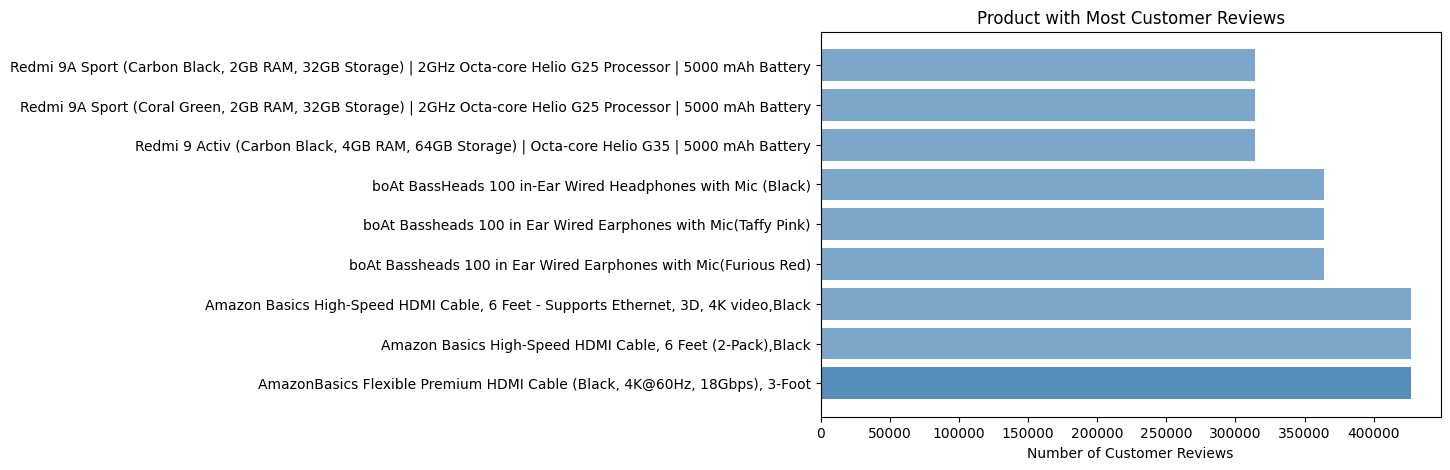

In [57]:
# Analyzing products with the most customer reviews
most_reviewed_products = df_new.sort_values(by='rating_count', ascending=False).head(10)

# Filtering the product with the most customer reviews
most_reviewed_product = most_reviewed_products.head(10)

# Visualizing the details of the product with the most customer reviews
plt.figure(figsize=(8, 5))
plt.barh(most_reviewed_product['product_name'], most_reviewed_product['rating_count'], color='steelblue', alpha=0.7)

# Adding labels and title
plt.xlabel('Number of Customer Reviews')
plt.title('Product with Most Customer Reviews')

# Displaying the chart
plt.tight_layout()
plt.show()


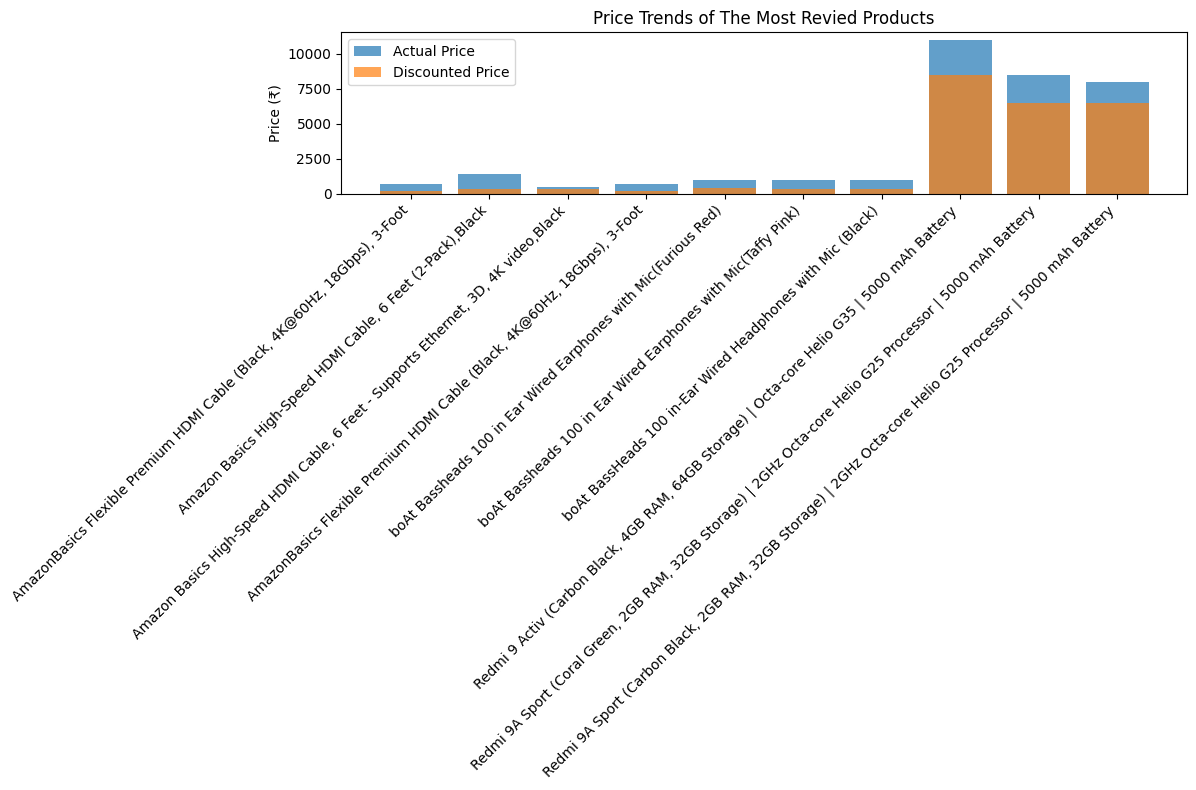

In [58]:
# Creating a bar chart to compare discounted price and actual price of the most reviewed product
plt.figure(figsize=(12, 8))
index = range(len(most_reviewed_product))
plt.bar(index, most_reviewed_product['actual_price'], label='Actual Price', alpha=0.7)
plt.bar(index, most_reviewed_product['discounted_price'], label='Discounted Price', alpha=0.7)

# Adding product names as x-axis labels
plt.xticks(index, most_reviewed_product['product_name'], rotation=45, ha='right', fontsize=10)

# Adding labels and title
plt.ylabel('Price (₹)')
plt.title('Price Trends of The Most Revied Products')
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

<ipython-input-59-e35c1db35a02>:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


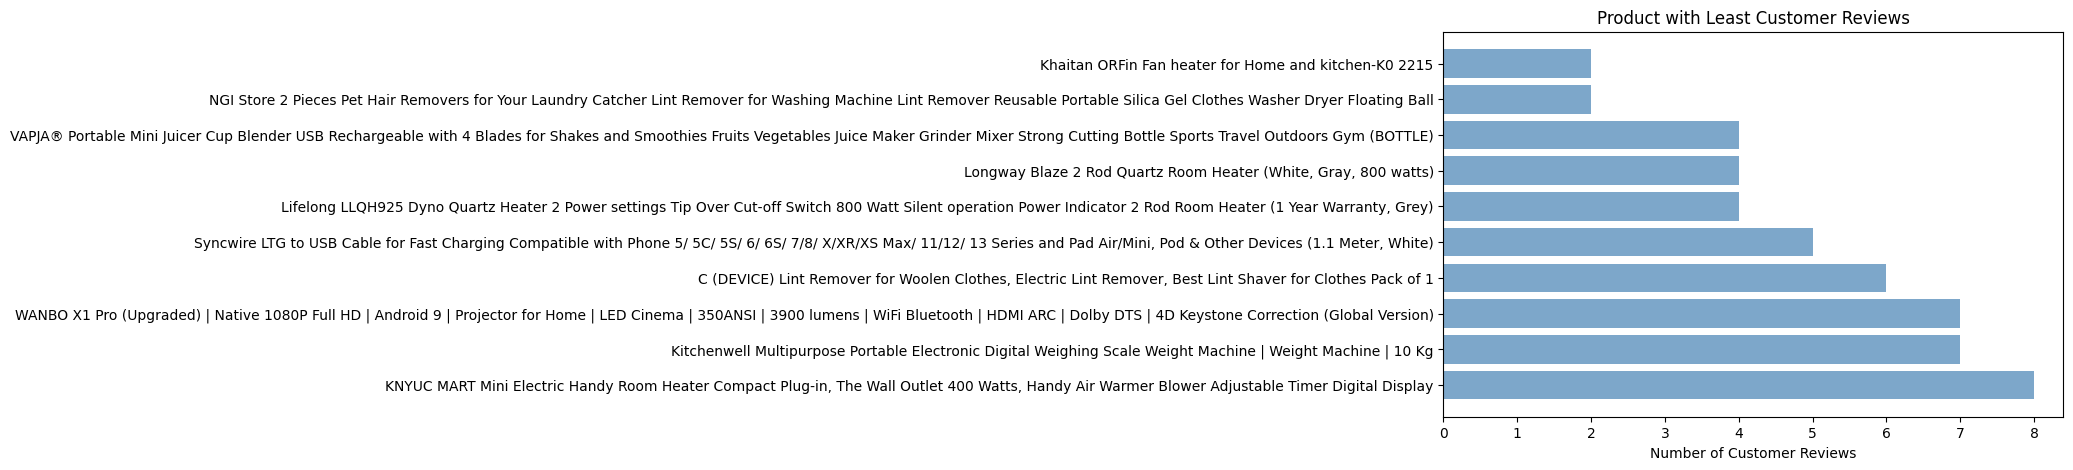

In [59]:
# Analyzing products with the least customer reviews
lowest_reviewed_products = df_new.sort_values(by='rating_count', ascending=False).tail(10)

# Filtering the product with the most customer reviews
lowest_reviewed_products = lowest_reviewed_products.head(10)

# Visualizing the details of the product with the most customer reviews
plt.figure(figsize=(8, 5))
plt.barh(lowest_reviewed_products['product_name'], lowest_reviewed_products['rating_count'], color='steelblue', alpha=0.7)

# Adding labels and title
plt.xlabel('Number of Customer Reviews')
plt.title('Product with Least Customer Reviews')

# Displaying the chart
plt.tight_layout()
plt.show()

<ipython-input-60-6761176ecd1a>:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


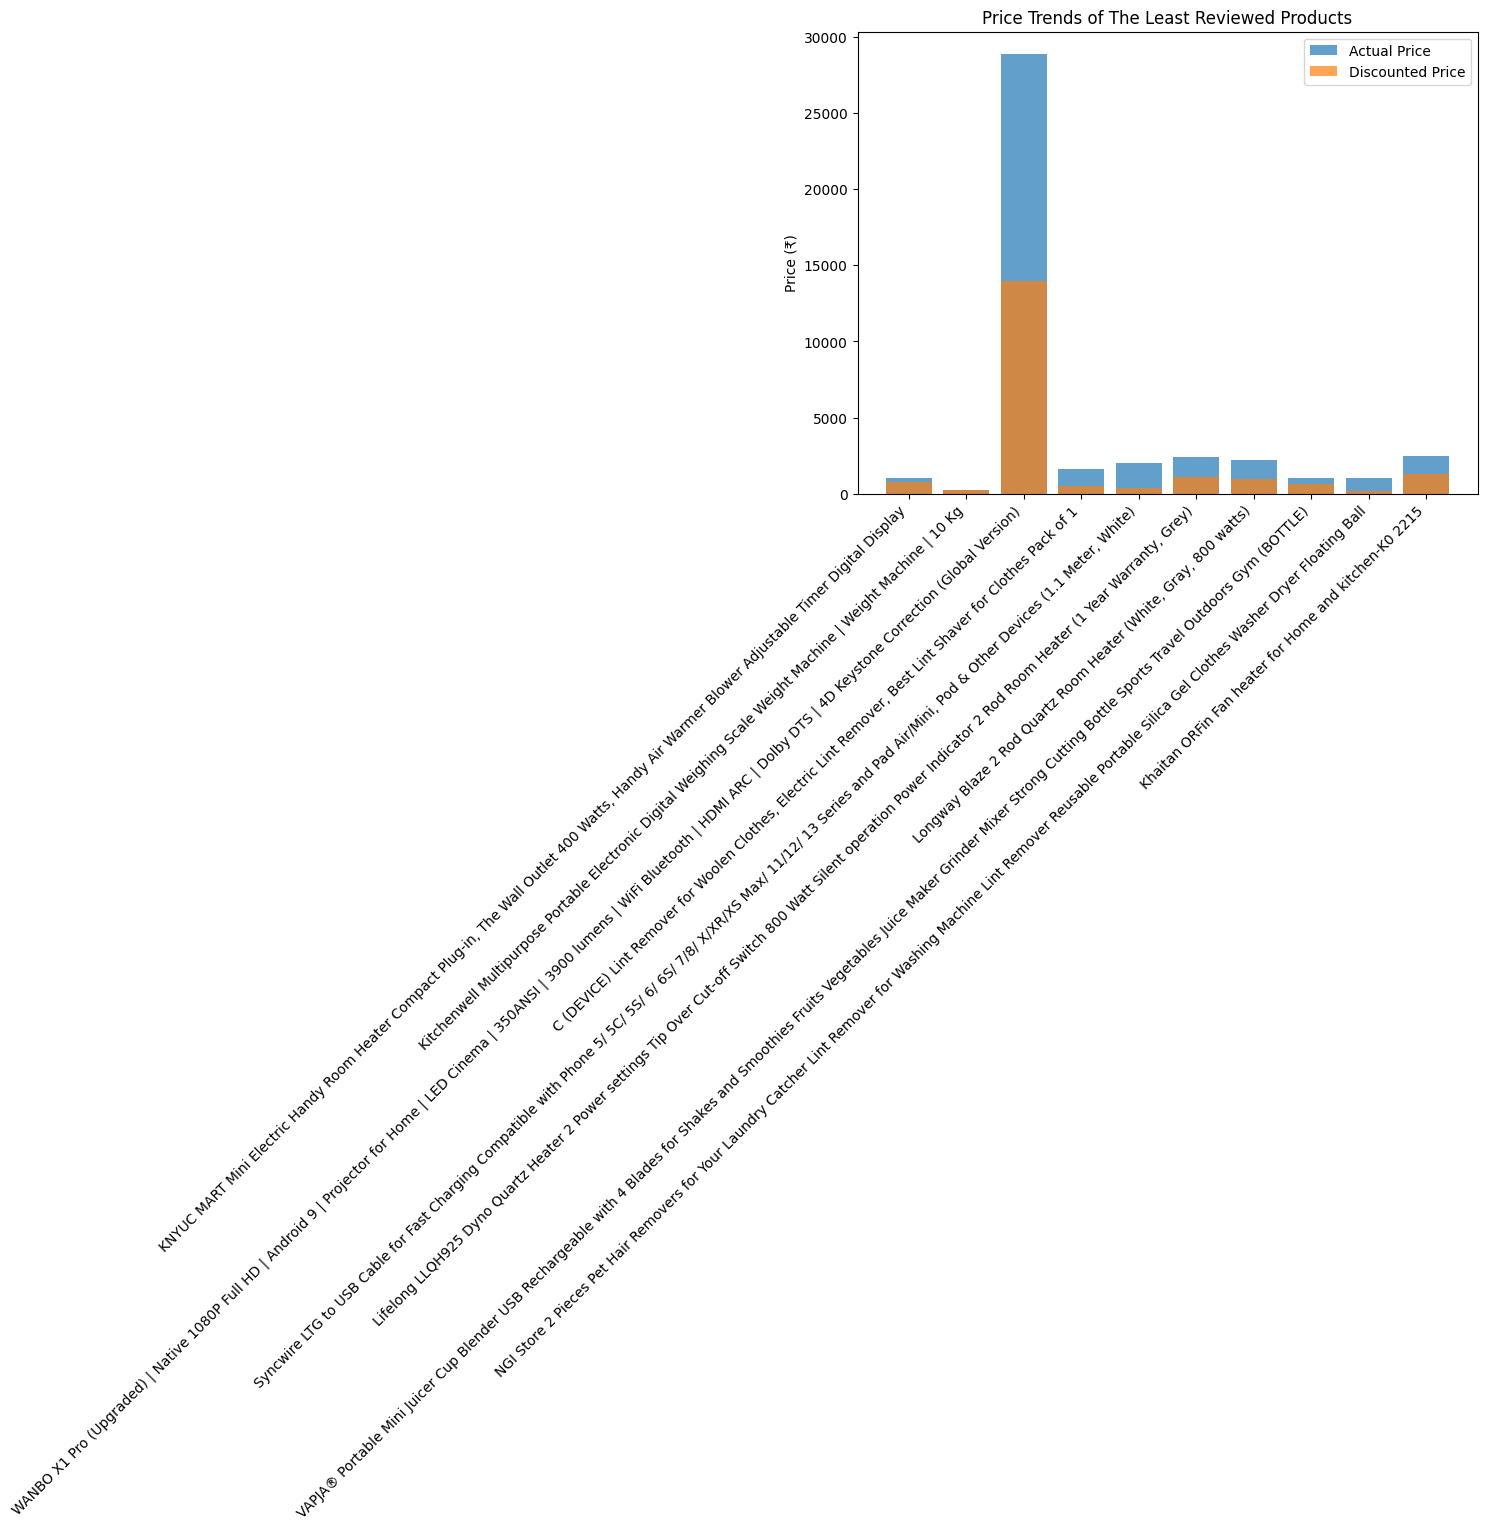

In [60]:
# Creating a bar chart to compare discounted price and actual price of the Least reviewed product
plt.figure(figsize=(8, 6))
index = range(len(lowest_reviewed_products))
plt.bar(index, lowest_reviewed_products['actual_price'], label='Actual Price', alpha=0.7)
plt.bar(index, lowest_reviewed_products['discounted_price'], label='Discounted Price', alpha=0.7)

# Adding product names as x-axis labels
plt.xticks(index, lowest_reviewed_products['product_name'], rotation=45, ha='right', fontsize=10)

# Adding labels and title
plt.ylabel('Price (₹)')
plt.title('Price Trends of The Least Reviewed Products')
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

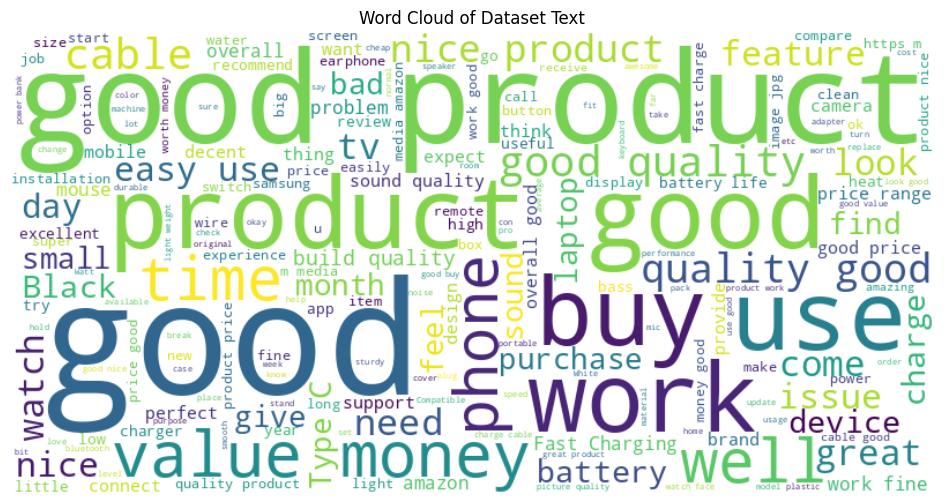

In [61]:
# Combining all text columns for the word cloud
text_data = df_new[['product_name', 'review_title', 'review_content']].fillna('').apply(
    lambda x: ' '.join(x), axis=1)

# Generating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data))

# Displaying the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Dataset Text')
plt.show()


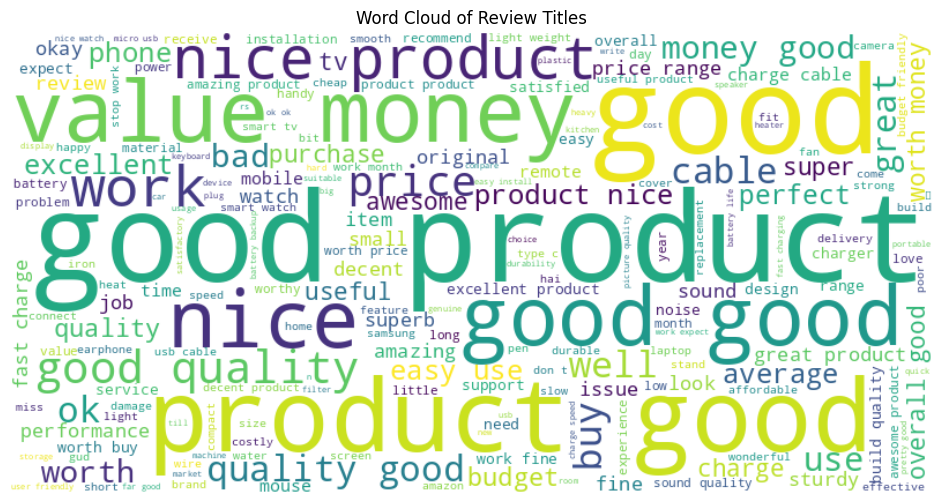

In [62]:
# Generating a word cloud specifically for the review titles
review_title_text = ' '.join(df_new['review_title'].fillna(''))

# Creating the word cloud
review_title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_title_text)

# Displaying the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(review_title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Titles')
plt.show()


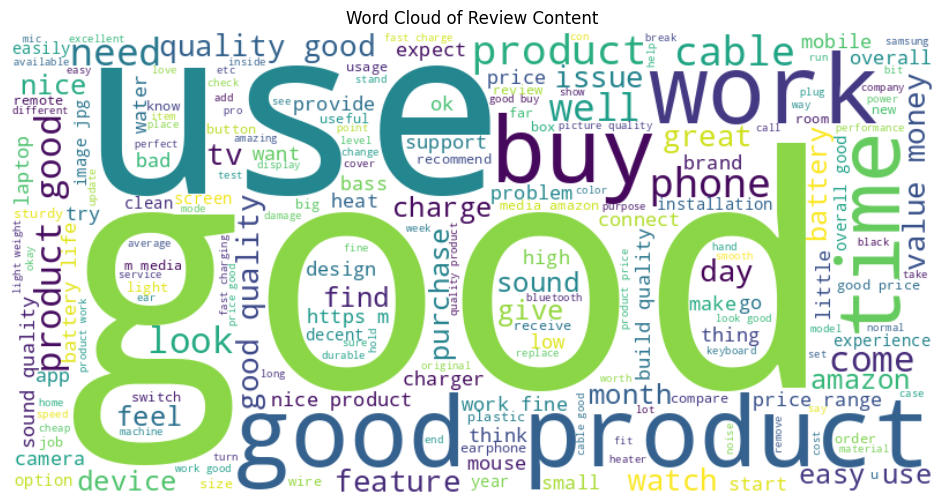

In [63]:
# Generating a word cloud specifically for the review content
review_content_text = ' '.join(df_new['review_content'].fillna(''))

# Creating the word cloud
review_content_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_content_text)

# Displaying the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(review_content_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Content')
plt.show()


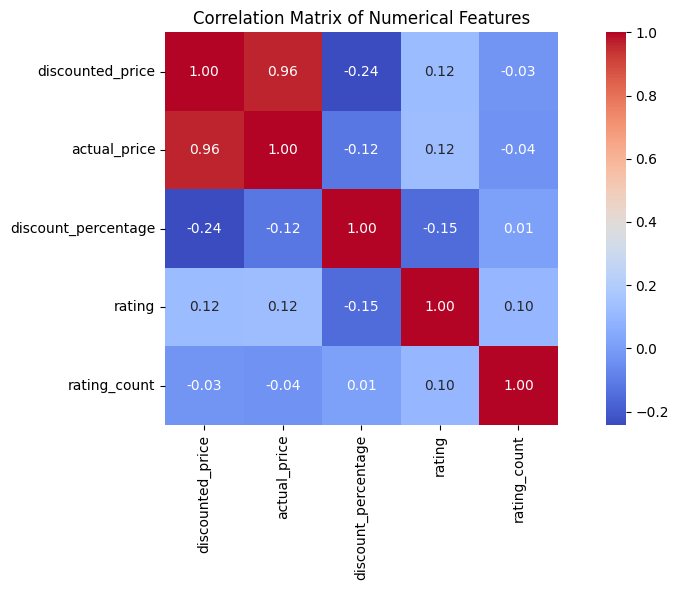

In [64]:
# Selecting only numerical features for correlation analysis
numerical_features = df_new[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']]

# Calculating the correlation matrix
correlation_matrix = numerical_features.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Adding labels and title
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()

# Displaying the heatmap
plt.show()

In [65]:
from textblob import TextBlob

# Extract review titles and content for sentiment analysis
reviews = df_new[['review_title', 'review_content']].dropna()

# Function to analyze sentiment using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to review titles and content
reviews['title_sentiment'] = reviews['review_title'].apply(analyze_sentiment)
reviews['content_sentiment'] = reviews['review_content'].apply(analyze_sentiment)

# Categorize sentiment polarity
def sentiment_category(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

reviews['title_sentiment_category'] = reviews['title_sentiment'].apply(sentiment_category)
reviews['content_sentiment_category'] = reviews['content_sentiment'].apply(sentiment_category)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Sentiment Analysis on Reviews", dataframe=reviews)

# Display processed sentiment results
reviews.head()


review_title  \
0  satisfied charging fast value money product re...   
1  good braid cable type c device good quality pr...   
2  good speed early version good product work goo...   
3  good product good nice nice product time chang...   
4  good original decent good secondary use good q...   

                                      review_content  title_sentiment  \
0  look durable charging fine toono complain char...         0.583333   
1  order cable connect phone android auto car cab...         0.647619   
2  durable sturdy https m media amazon com image ...         0.566667   
3  good product long wire charge good nice buy ca...         0.616667   
4  buy instead original apple work fast apple cha...         0.494167   

   content_sentiment title_sentiment_category content_sentiment_category  
0           0.411458                 Positive                   Positive  
1           0.317487                 Positive                   Positive  
2           0.633333                 Positive                   Positive  
3           0.434848                 Positive                   Positive  
4           0.363585                 Positive                   Positive

In [67]:
# Display the distribution of sentiment labels
sentiment_distribution = reviews['content_sentiment_category'].value_counts()
sentiment_distribution

content_sentiment_category
Positive    1456
Negative       7
Neutral        2
Name: count, dtype: int64

In [66]:
# Map ratings to sentiment labels
def map_sentiment(rating):
    rating = float(rating)  # Ensuring ratings are treated as numbers
    if rating >= 4.0:
        return 'positive'
    elif rating >= 3.0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment mapping to the 'rating' column
df_new['rating_sentiment'] = df_new['rating'].apply(map_sentiment)

# Display the distribution of sentiment labels
rating_sentiment = df_new['rating_sentiment'].value_counts()
rating_sentiment


rating_sentiment
positive    1110
neutral      349
negative       6
Name: count, dtype: int64

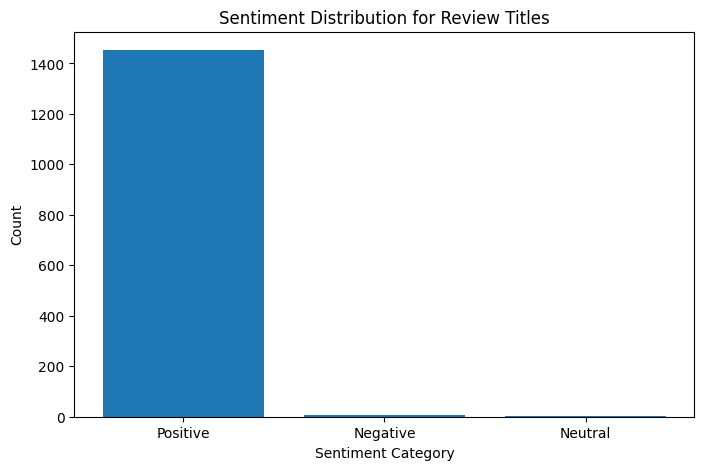

In [113]:
# Sentiment category distribution for titles and content
title_sentiment_counts = reviews['title_sentiment_category'].value_counts()
content_sentiment_counts = reviews['content_sentiment_category'].value_counts()
rating_sentiment_counts = df_new['rating_sentiment'].value_counts()

# Plot title sentiment distribution
plt.figure(figsize=(8, 5))
plt.bar(title_sentiment_counts.index, title_sentiment_counts.values)
plt.title('Sentiment Distribution for Review Titles')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

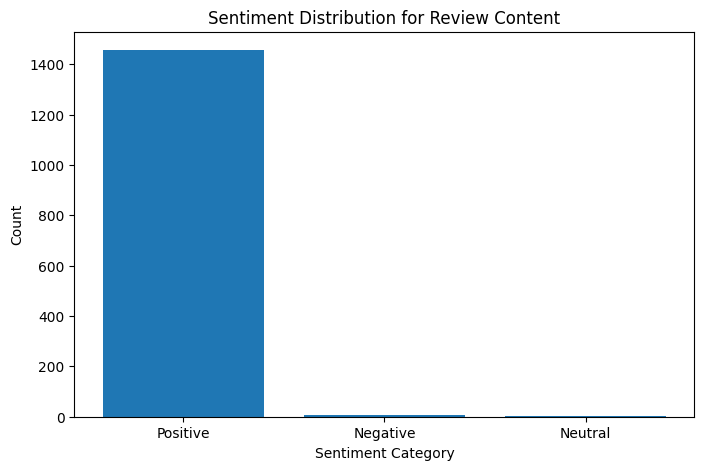

In [112]:
# Plot review content sentiment distribution
plt.figure(figsize=(8, 5))
plt.bar(content_sentiment_counts.index, content_sentiment_counts.values)
plt.title('Sentiment Distribution for Review Content')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

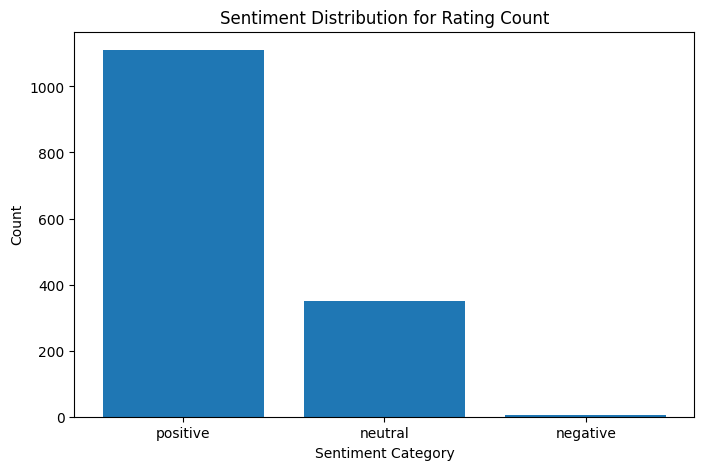

In [114]:
# Plot rating sentiment distribution
plt.figure(figsize=(8, 5))
plt.bar(rating_sentiment_counts.index, rating_sentiment_counts.values)
plt.title('Sentiment Distribution for Rating Count')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(reviews['review_content'])

# Target variable
y = reviews['content_sentiment_category']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Display the shapes of training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1172, 9791), (293, 9791), (1172,), (293,))

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train a Logistic Regression model
lr_model = LogisticRegression(random_state=42, class_weight='balanced')
lr_model.fit(X_train, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, lr_pred)
accuracy

0.9965870307167235

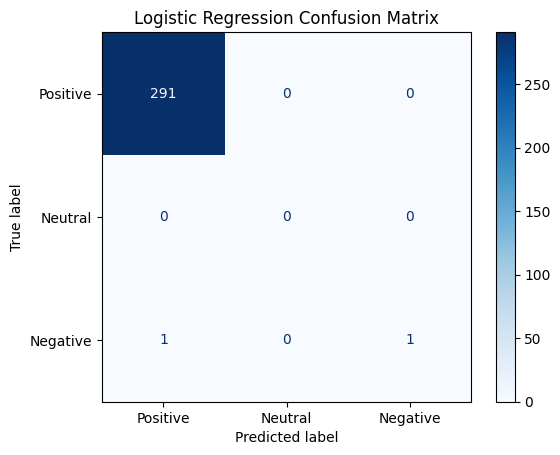

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Creating confusion matrix for Logistic regression
cm_lr = confusion_matrix(y_test, lr_pred, labels=['Positive', 'Neutral', 'Negative'])
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Positive', 'Neutral', 'Negative'])
disp_lr.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Train the Decision Tree Model
decision_tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
decision_tree_model.fit(X_train, y_train)

# Step 2: Make Predictions
y_pred_dt = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
accuracy


0.9931740614334471

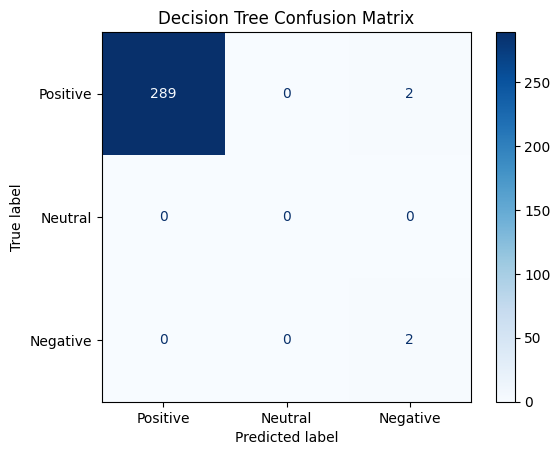

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate and Visualize the Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=['Positive', 'Neutral', 'Negative'])
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Positive', 'Neutral', 'Negative'])

# Plot the confusion matrix
disp_dt.plot(cmap=plt.cm.Blues)
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [74]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Make predictions
pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, pred_rf)
accuracy_rf


0.9965870307167235

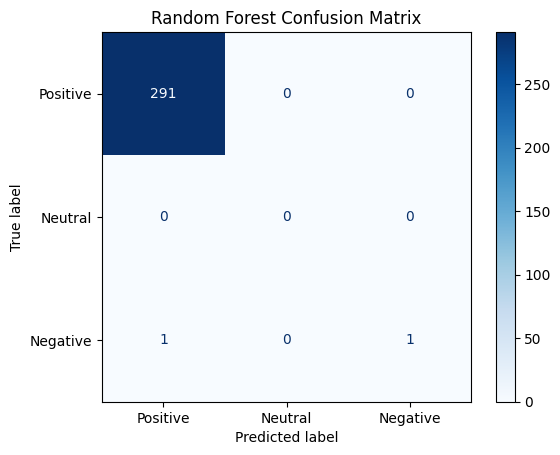

In [75]:
# Creating confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, pred_rf, labels=['Positive', 'Neutral', 'Negative'])
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Positive', 'Neutral', 'Negative'])
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()

In [76]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, pred_gb)
accuracy_gb

0.9965870307167235

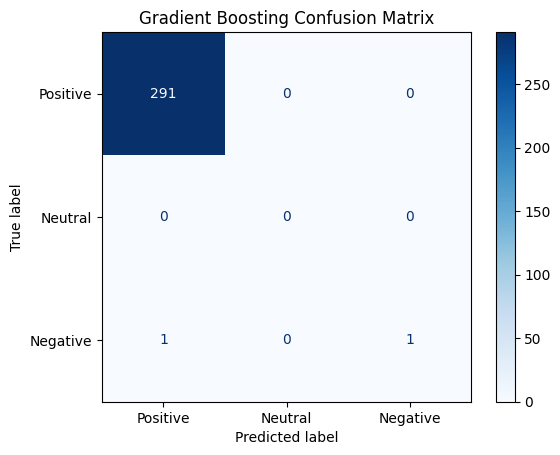

In [77]:
# Creating confusion matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, pred_gb, labels=['Positive', 'Neutral', 'Negative'])
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=['Positive', 'Neutral', 'Negative'])
disp_gb.plot(cmap=plt.cm.Blues)
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

In [78]:
# Support Vector Machine Classifier
svm_model = SVC(random_state=42, class_weight='balanced')
svm_model.fit(X_train, y_train)
pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, pred_svm)
accuracy_svm

0.9965870307167235

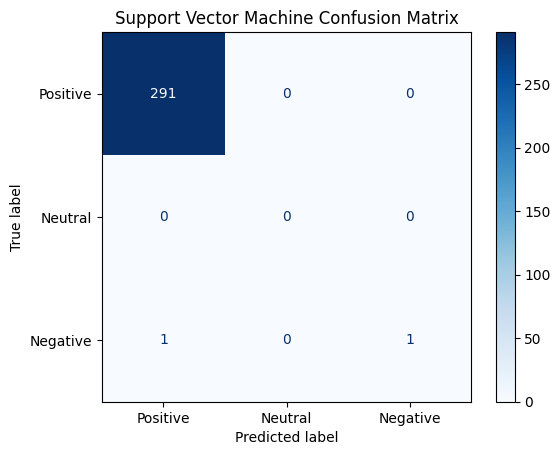

In [79]:
# Creating confusion matrix for SVM
cm_svm = confusion_matrix(y_test, pred_svm, labels=['Positive', 'Neutral', 'Negative'])
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Positive', 'Neutral', 'Negative'])
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

In [80]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df_new['review_content'])

# Target variable
y = df_new['rating_sentiment']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Display the shapes of training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1172, 9791), (293, 9791), (1172,), (293,))

In [81]:
# Train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, lr_pred)
accuracy

0.78839590443686

In [82]:
# Generate the classification report for the logistic regression model
classification_report_lr = classification_report(y_test, lr_pred, target_names=['Negative', 'Neutral', 'Positive'])

print(classification_report_lr)

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.76      0.19      0.30        70
    Positive       0.79      0.98      0.88       222

    accuracy                           0.79       293
   macro avg       0.52      0.39      0.39       293
weighted avg       0.78      0.79      0.73       293



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


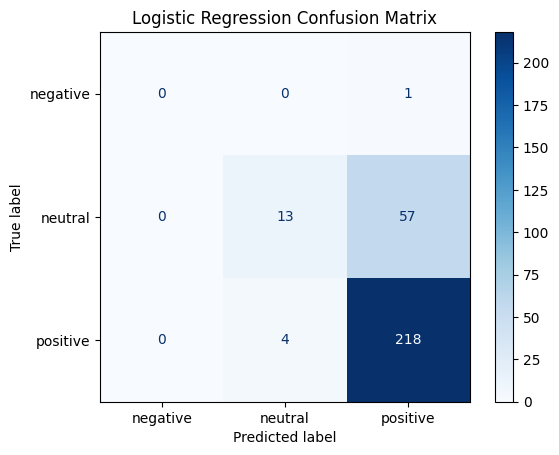

In [83]:
# Dynamically determine the labels present in y_test
unique_labels = sorted(y_test.unique())

# Compute the confusion matrix with the correct labels
cm_lr_r = confusion_matrix(y_test, lr_pred, labels=unique_labels)

# Display the confusion matrix
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr_r, display_labels=unique_labels)
disp_lr.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [84]:
# Step 1: Train the Decision Tree Model
decision_tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
decision_tree_model.fit(X_train, y_train)

# Step 2: Make Predictions
y_pred_dt = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
accuracy

0.6928327645051194

In [85]:
# Generate the classification report for the decision tree model
classification_report_dt = classification_report(y_test, y_pred_dt, target_names=['Negative', 'Neutral', 'Positive'])

print(classification_report_dt)

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.39      0.43      0.41        70
    Positive       0.81      0.78      0.80       222

    accuracy                           0.69       293
   macro avg       0.40      0.40      0.40       293
weighted avg       0.71      0.69      0.70       293



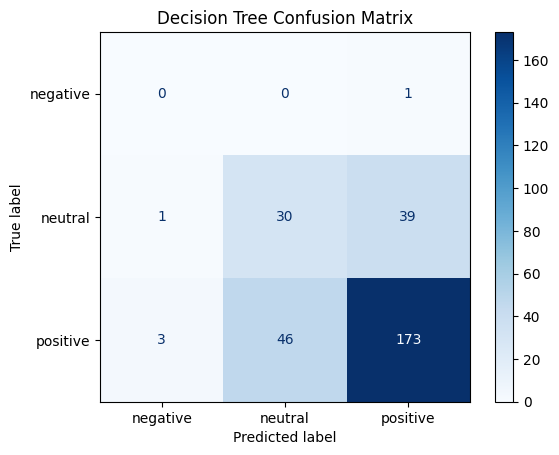

In [86]:
# Dynamically determine the labels present in y_test
unique_labels = sorted(y_test.unique())

# Compute the confusion matrix with the correct labels
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=unique_labels)

# Generate and Visualize the Confusion Matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=unique_labels)

# Plot the confusion matrix
disp_dt.plot(cmap=plt.cm.Blues)
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [87]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Make predictions
pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, pred_rf)
accuracy_rf

0.8054607508532423

In [88]:
# Generate the classification report for the random forest model
classification_report_rf = classification_report(y_test, pred_rf, target_names=['Negative', 'Neutral', 'Positive'])

print(classification_report_rf)

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.94      0.21      0.35        70
    Positive       0.80      1.00      0.89       222

    accuracy                           0.81       293
   macro avg       0.58      0.40      0.41       293
weighted avg       0.83      0.81      0.75       293



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


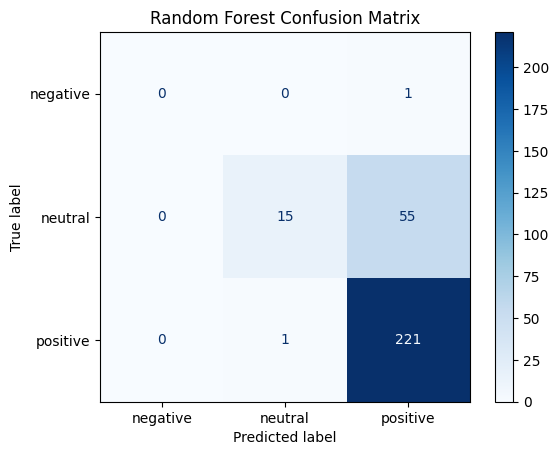

In [89]:
# Creating confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, pred_rf, labels=unique_labels)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=unique_labels)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()

In [90]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, pred_gb)
accuracy_gb

0.8122866894197952

In [91]:
# Generate the classification report for the gradient boosting model
classification_report_gb = classification_report(y_test, pred_gb, target_names=['Negative', 'Neutral', 'Positive'])

print(classification_report_gb)

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.75      0.34      0.47        70
    Positive       0.82      0.96      0.89       222

    accuracy                           0.81       293
   macro avg       0.52      0.44      0.45       293
weighted avg       0.80      0.81      0.78       293



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


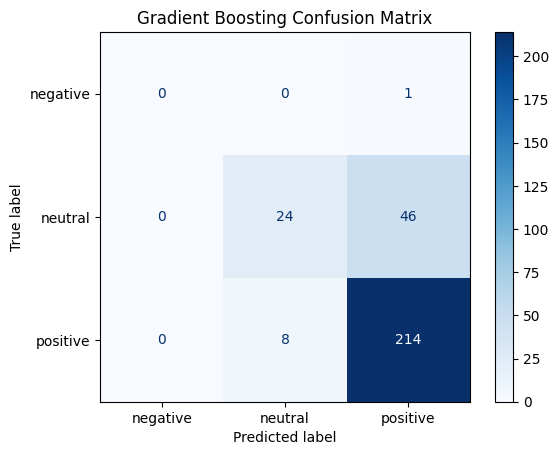

In [92]:
# Creating confusion matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, pred_gb, labels=unique_labels)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=unique_labels)
disp_gb.plot(cmap=plt.cm.Blues)
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

In [93]:
# Support Vector Machine Classifier
svm_model = SVC(random_state=42, class_weight='balanced')
svm_model.fit(X_train, y_train)
pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, pred_svm)
accuracy_svm

0.7952218430034129

In [94]:
# Generate the classification report for the SVM model
classification_report_svm = classification_report(y_test, pred_svm, target_names=['Negative', 'Neutral', 'Positive'])

print(classification_report_svm)

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.57      0.56      0.57        70
    Positive       0.86      0.87      0.87       222

    accuracy                           0.80       293
   macro avg       0.48      0.48      0.48       293
weighted avg       0.79      0.80      0.79       293



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


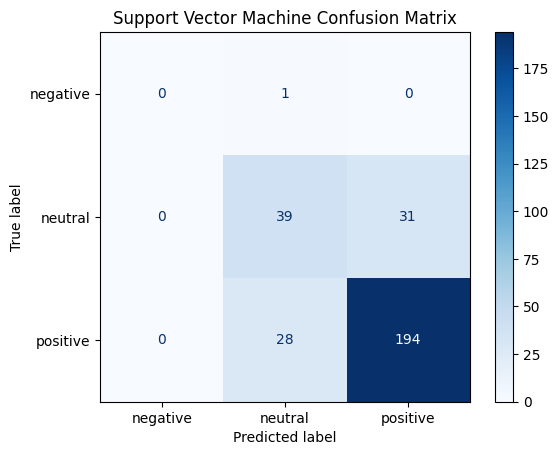

In [95]:
# Creating confusion matrix for SVM
cm_svm = confusion_matrix(y_test, pred_svm, labels=unique_labels)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=unique_labels)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the logistic regression model with hyperparameter tuning
param_grid = {
    'C': [0.02, 0.2, 2, 20, 200],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Optimization solvers
    'class_weight': ['balanced', None]  # Handle class imbalance
}

# Perform GridSearchCV for logistic regression
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                              param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Get the best model and evaluate accuracy
best_lr_model = grid_search_lr.best_estimator_
lr_pred_optimized = best_lr_model.predict(X_test)
accuracy_lr_optimized = accuracy_score(y_test, lr_pred_optimized)

# Display the best parameters and accuracy
accuracy_lr_optimized, grid_search_lr.best_params_


(0.7986348122866894,
 {'C': 20, 'class_weight': 'balanced', 'solver': 'liblinear'})

In [97]:
# Generate the classification report for the SVM model
classification_report_optz_lr = classification_report(y_test, lr_pred_optimized, target_names=['Negative', 'Neutral', 'Positive'])

print(classification_report_optz_lr)

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.59      0.51      0.55        70
    Positive       0.85      0.89      0.87       222

    accuracy                           0.80       293
   macro avg       0.48      0.47      0.47       293
weighted avg       0.79      0.80      0.79       293



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


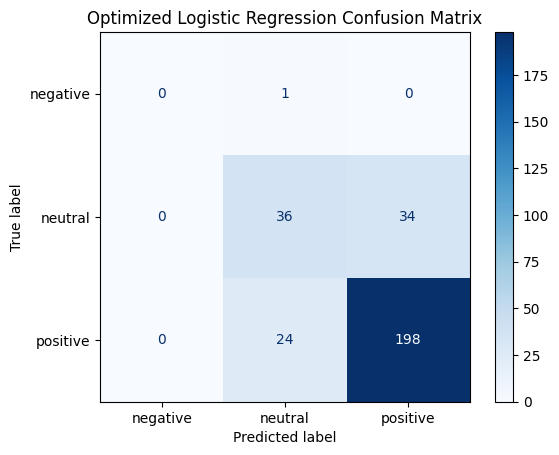

In [98]:
# Generate the confusion matrix for the optimized Logistic Regression model
cm_optimized_lr = confusion_matrix(y_test, lr_pred_optimized, labels=unique_labels)

# Visualize the confusion matrix
disp_optimized_lr = ConfusionMatrixDisplay(confusion_matrix=cm_optimized_lr, display_labels=unique_labels)
disp_optimized_lr.plot(cmap=plt.cm.Blues)

# Add a title to the confusion matrix
plt.title('Optimized Logistic Regression Confusion Matrix')
plt.show()

In [99]:
# Define the parameter grid for Decision Tree
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', None]
}

# Perform GridSearchCV to find the best parameters
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Get the best model and evaluate accuracy
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt_optimized = best_dt_model.predict(X_test)
accuracy_dt_optimized = accuracy_score(y_test, y_pred_dt_optimized)

# Display the best parameters and accuracy
accuracy_dt_optimized, grid_search_dt.best_params_

(0.7747440273037542,
 {'class_weight': None,
  'criterion': 'gini',
  'max_depth': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 2})

In [100]:
# Generate the classification report for the optimized decision tree model
classification_report_optz_dt = classification_report(y_test, y_pred_dt_optimized, target_names=['Negative', 'Neutral', 'Positive'])

print(classification_report_optz_dt)

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.67      0.14      0.24        70
    Positive       0.78      0.98      0.87       222

    accuracy                           0.77       293
   macro avg       0.48      0.37      0.37       293
weighted avg       0.75      0.77      0.71       293



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


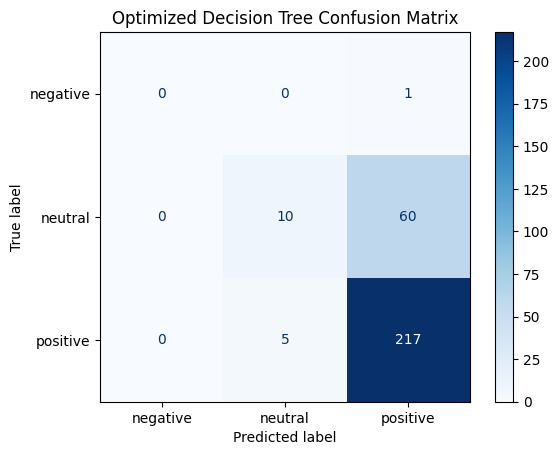

In [101]:
# Generate the confusion matrix for the optimized Decision Tree model
cm_optimized_dt = confusion_matrix(y_test, y_pred_dt_optimized, labels=unique_labels)

# Visualize the confusion matrix
disp_optimized_dt = ConfusionMatrixDisplay(confusion_matrix=cm_optimized_dt, display_labels=unique_labels)
disp_optimized_dt.plot(cmap=plt.cm.Blues)

# Add a title to the confusion matrix
plt.title('Optimized Decision Tree Confusion Matrix')
plt.show()

In [102]:
# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

best_params, best_accuracy

Fitting 3 folds for each of 216 candidates, totalling 648 fits


({'bootstrap': False,
  'max_depth': None,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.7900911535182634)

In [103]:
# Generate the classification report for the optimized Random Forest model
classification_report_optz_rf = classification_report(y_test, grid_search.best_estimator_.predict(X_test), target_names=['Negative', 'Neutral', 'Positive'])

print(classification_report_optz_rf)

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.79      0.43      0.56        70
    Positive       0.84      0.97      0.90       222

    accuracy                           0.84       293
   macro avg       0.54      0.47      0.49       293
weighted avg       0.83      0.84      0.82       293



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


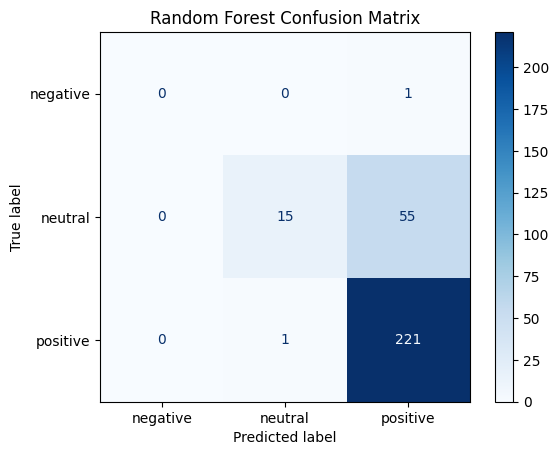

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, pred_rf, labels=unique_labels)

# Display the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=unique_labels)
disp_rf.plot(cmap=plt.cm.Blues)

# Add a title to the plot
plt.title('Random Forest Confusion Matrix')
plt.show()

In [105]:
# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42),
                              param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Get the best model and evaluate accuracy
best_gb_model = grid_search_gb.best_estimator_
pred_gb_optimized = best_gb_model.predict(X_test)
accuracy_gb_optimized = accuracy_score(y_test, pred_gb_optimized)

# Display the best parameters and accuracy
accuracy_gb_optimized, grid_search_gb.best_params_

(0.8156996587030717,
 {'learning_rate': 0.01,
  'max_depth': 7,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 300})

In [111]:
# Generate the classification report for the optimized decision tree model
classification_report_optz_gb = classification_report(y_test, pred_gb_optimized, target_names=['Negative', 'Neutral', 'Positive'])

print(classification_report_optz_gb)

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.76      0.36      0.49        70
    Positive       0.82      0.96      0.89       222

    accuracy                           0.82       293
   macro avg       0.53      0.44      0.46       293
weighted avg       0.80      0.82      0.79       293



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


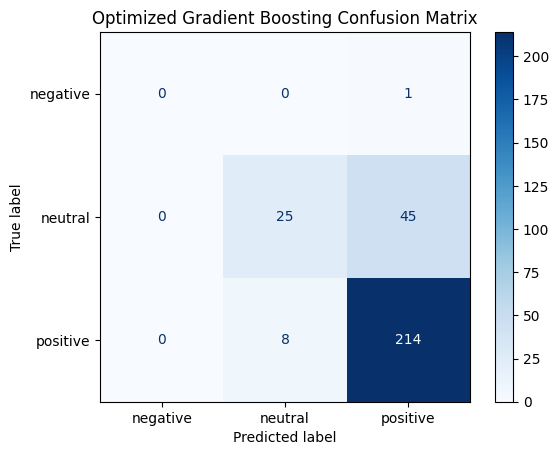

In [110]:
# Generate the confusion matrix for the optimized Gradient Boosting model
cm_optimized_gb = confusion_matrix(y_test, pred_gb_optimized, labels=unique_labels)

# Visualize the confusion matrix
disp_optimized_gb = ConfusionMatrixDisplay(confusion_matrix=cm_optimized_gb, display_labels=unique_labels)
disp_optimized_gb.plot(cmap=plt.cm.Blues)

# Add a title to the confusion matrix
plt.title('Optimized Gradient Boosting Confusion Matrix')
plt.show()

In [107]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Create a pipeline with scaling and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # SVM requires normalized data
    ('svm', SVC(random_state=123, class_weight='balanced'))
])

# Define hyperparameter grid for SVM
param_grid = {
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__C': [0.2, 2, 20],
    'svm__gamma': ['scale', 'auto']
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and evaluate accuracy
best_svm_model = grid_search.best_estimator_
pred_svm_optimized = best_svm_model.predict(X_test)
accuracy_svm_optimized = accuracy_score(y_test, pred_svm_optimized)

accuracy_svm_optimized, grid_search.best_params_

(0.7918088737201365, {'svm__C': 2, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'})

In [108]:
# Generate the classification report for the optimized decision tree model
classification_report_optz_svm = classification_report(y_test, pred_svm_optimized, target_names=['Negative', 'Neutral', 'Positive'])

print(classification_report_optz_svm)

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.86      0.17      0.29        70
    Positive       0.79      0.99      0.88       222

    accuracy                           0.79       293
   macro avg       0.55      0.39      0.39       293
weighted avg       0.80      0.79      0.73       293



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


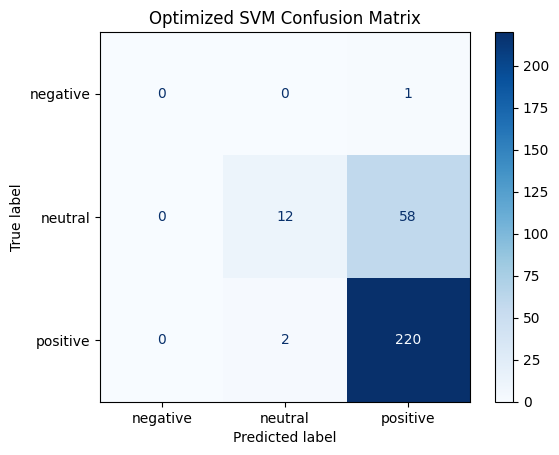

In [109]:
# Generate the confusion matrix for the optimized SVM model
cm_optimized_svm = confusion_matrix(y_test, pred_svm_optimized, labels=unique_labels)

# Visualize the confusion matrix
disp_optimized_svm = ConfusionMatrixDisplay(confusion_matrix=cm_optimized_svm, display_labels=unique_labels)
disp_optimized_svm.plot(cmap=plt.cm.Blues)

# Add a title to the confusion matrix plot
plt.title('Optimized SVM Confusion Matrix')
plt.show()